In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime
import os

In [136]:
pd.options.display.max_columns = None

In [137]:
dati = pd.read_csv('bitcoin_data.csv')
dati

,Timestamp,Price
0,2013-04-28 00:00:00.000,135.300000
1,2013-04-29 00:00:00.000,141.960000
2,2013-04-30 00:00:00.000,135.300000
3,2013-05-01 00:00:00.000,117.000000
4,2013-05-02 00:00:00.000,103.430000
...,...,...
3875,2023-12-09 00:00:00.000,44202.176109
3876,2023-12-10 00:00:00.000,43745.491992
3877,2023-12-11 00:00:00.000,43757.959938
3878,2023-12-12 00:00:00.000,41200.962726


In [138]:
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])

In [139]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  3880 non-null   datetime64[ns]
 1   Price      3880 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.8 KB


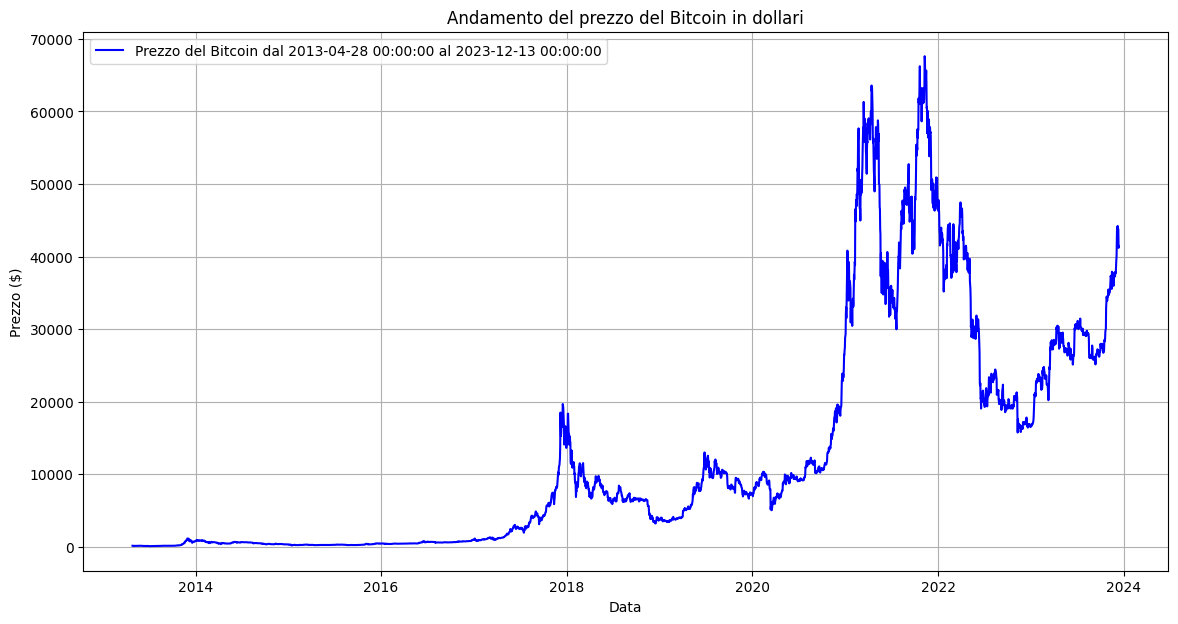

In [140]:
x = dati['Timestamp']
y = dati['Price']

plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"Prezzo del Bitcoin dal {str(x.iloc[0])} al {str(x.iloc[-1])}", color='blue')
plt.title('Andamento del prezzo del Bitcoin in dollari')
plt.xlabel('Data')
plt.ylabel('Prezzo ($)')
plt.legend()
plt.grid(True)
plt.show()

### Strategia Giacomo semplice (ritiro tutto ciò che eccede l'investimento di base, e lo faccio ogni tempo_controllo giorni)

In [141]:
dati = pd.read_csv('bitcoin_data.csv')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])

In [142]:
data_inizio = '2013-04-28'

In [143]:
dati[dati['Timestamp'] == data_inizio]

,Timestamp,Price
0,2013-04-28,135.3


In [144]:
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
indice_inizio

0

In [145]:
dati = dati[indice_inizio:]

In [146]:
dati = dati.reset_index(drop=True)

In [147]:
dati

,Timestamp,Price
0,2013-04-28,135.300000
1,2013-04-29,141.960000
2,2013-04-30,135.300000
3,2013-05-01,117.000000
4,2013-05-02,103.430000
...,...,...
3875,2023-12-09,44202.176109
3876,2023-12-10,43745.491992
3877,2023-12-11,43757.959938
3878,2023-12-12,41200.962726


In [148]:
dollari_in_banca = 10000
deposito_YP = 0
investimento_base = 100
tempo_controllo = 7
bitcoin_YP = 0
bitcoin_YP_in_dollari = 0
dollari_investiti = investimento_base
ricarica = 0
tempo_ricarica = 9999
prezzo_attuale = dati['Price'][0]
prezzo_iniziale = dati['Price'][0]

In [149]:
def bitcoin_in_dollari(bitcoin, prezzo_bitcoin):
    return bitcoin * prezzo_bitcoin

def dollari_in_bitcoin(euro, prezzo_bitcoin):
    return euro / prezzo_bitcoin

In [150]:
# Ricarica iniziale del deposito di YP
dollari_in_banca -= investimento_base
deposito_YP += investimento_base

# Acquisto bitcoin su YP
deposito_YP -= investimento_base
bitcoin_YP += dollari_in_bitcoin(investimento_base, prezzo_attuale)
bitcoin_YP_in_dollari = investimento_base

In [151]:
tabella_finale = dati.copy()
tabella_finale.rename(columns={'Timestamp': 'Data'}, inplace=True)
tabella_finale.rename(columns={'Price': 'Prezzo bitcoin in $'}, inplace=True)
tabella_finale['Deposito su YP in $'] = 0
tabella_finale['Bitcoin su YP'] = 0
tabella_finale['Bitcoin su YP in $'] = 0
tabella_finale['Ritiro in $'] = 0
tabella_finale['Soldi in banca in $'] = dollari_in_banca

In [152]:
for t in range(len(dati)):
        prezzo_attuale = tabella_finale['Prezzo bitcoin in $'][t]

        if (t+1) % tempo_controllo == 0:
                if bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) > investimento_base:
                        ritiro_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) - investimento_base
                        tabella_finale['Ritiro in $'][t] = ritiro_in_dollari
                        bitcoin_YP -= dollari_in_bitcoin(ritiro_in_dollari, prezzo_attuale)
                        bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                        deposito_YP += ritiro_in_dollari

        if t == 0:
                tabella_finale['Deposito su YP in $'][t] = deposito_YP
                tabella_finale['Bitcoin su YP'][t] = bitcoin_YP
                tabella_finale['Bitcoin su YP in $'][t] = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
        else:
                tabella_finale['Deposito su YP in $'][t] = deposito_YP
                tabella_finale['Bitcoin su YP'][t] = bitcoin_YP
                tabella_finale['Bitcoin su YP in $'][t] = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_229816\124352350.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tabella_finale['Deposito su YP in $'][t] = deposito_YP
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_229816\124352350.p

In [153]:
tabella_finale['Data'] = tabella_finale['Data'].dt.strftime('%d/%m/%Y')

In [154]:
tabella_finale

,Data,Prezzo bitcoin in $,Deposito su YP in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro in $,Soldi in banca in $
0,28/04/2013,135.300000,0.000000,0.739098,100.000000,0.0,9900
1,29/04/2013,141.960000,0.000000,0.739098,104.922395,0.0,9900
2,30/04/2013,135.300000,0.000000,0.739098,100.000000,0.0,9900
3,01/05/2013,117.000000,0.000000,0.739098,86.474501,0.0,9900
4,02/05/2013,103.430000,0.000000,0.739098,76.444937,0.0,9900
...,...,...,...,...,...,...,...
3875,09/12/2023,44202.176109,697.904994,0.001523,67.331096,0.0,9900
3876,10/12/2023,43745.491992,697.904994,0.001523,66.635450,0.0,9900
3877,11/12/2023,43757.959938,697.904994,0.001523,66.654442,0.0,9900
3878,12/12/2023,41200.962726,697.904994,0.001523,62.759489,0.0,9900


In [155]:
tabella_finale[tabella_finale['Deposito su YP in $'] > 697]

,Data,Prezzo bitcoin in $,Deposito su YP in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro in $,Soldi in banca in $
3121,15/11/2021,65648.977791,697.904994,0.001523,100.000000,3.951892,9900
3122,16/11/2021,63933.835443,697.904994,0.001523,97.387404,0.000000,9900
3123,17/11/2021,60448.562513,697.904994,0.001523,92.078452,0.000000,9900
3124,18/11/2021,60603.655867,697.904994,0.001523,92.314698,0.000000,9900
3125,19/11/2021,56987.322339,697.904994,0.001523,86.806108,0.000000,9900
...,...,...,...,...,...,...,...
3875,09/12/2023,44202.176109,697.904994,0.001523,67.331096,0.000000,9900
3876,10/12/2023,43745.491992,697.904994,0.001523,66.635450,0.000000,9900
3877,11/12/2023,43757.959938,697.904994,0.001523,66.654442,0.000000,9900
3878,12/12/2023,41200.962726,697.904994,0.001523,62.759489,0.000000,9900


In [156]:
tabella_finale['Data'] = pd.to_datetime(tabella_finale['Data'])

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_229816\1791676333.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tabella_finale['Data'] = pd.to_datetime(tabella_finale['Data'])


In [157]:
tabella_finale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 3880 non-null   datetime64[ns]
 1   Prezzo bitcoin in $  3880 non-null   float64       
 2   Deposito su YP in $  3880 non-null   float64       
 3   Bitcoin su YP        3880 non-null   float64       
 4   Bitcoin su YP in $   3880 non-null   float64       
 5   Ritiro in $          3880 non-null   float64       
 6   Soldi in banca in $  3880 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 212.3 KB


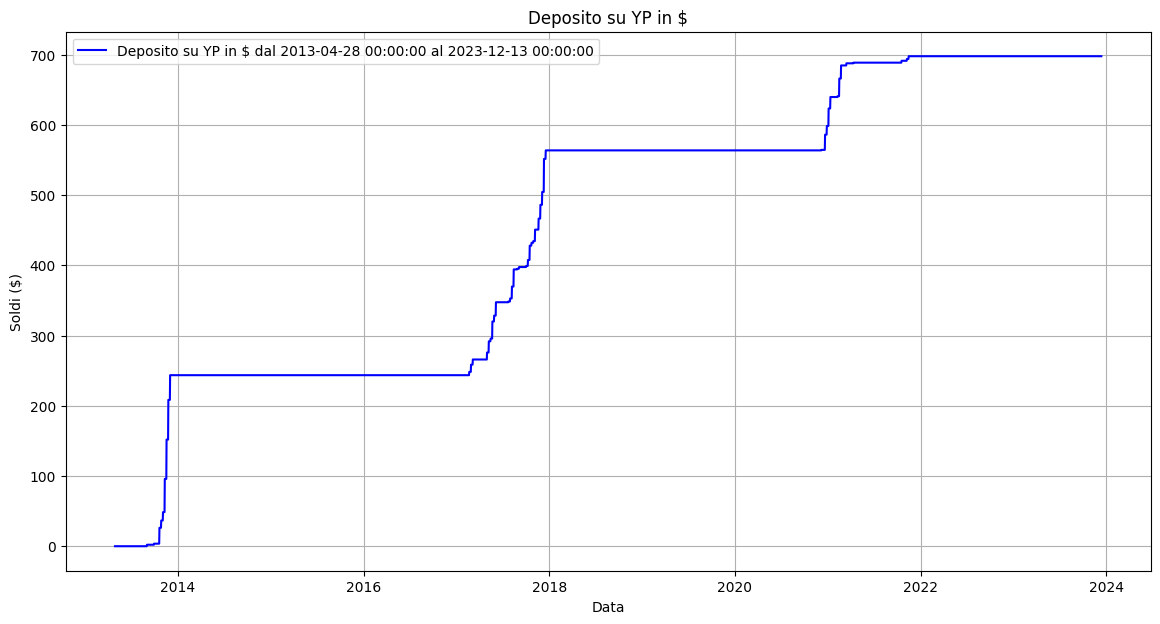

In [158]:
x = dati['Timestamp']
y = tabella_finale['Deposito su YP in $']

plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"Deposito su YP in $ dal {str(x.iloc[0])} al {str(x.iloc[-1])}", color='blue')
plt.title('Deposito su YP in $')
plt.xlabel('Data')
plt.ylabel('Soldi ($)')
plt.legend()
plt.grid(True)
plt.show()

### Strategia Giacomo con ritiro parziale dell'eccesso rispetto all'investimento di base

In [159]:
dati = pd.read_csv('bitcoin_data.csv')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])

### Strategia inventata da me

In [160]:
dati = pd.read_csv('bitcoin_data.csv')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])

### Strategia del VA

In [161]:
# Dataset con granularità di 1 giorno
dati = pd.read_csv('bitcoin_data.csv')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])

# Dataset con granularità di 1 minuto
# dati = pd.read_csv('Bitcoin dal 01 01 2012 al 31 03 2021 con granularità al minuto (già inputato).csv')
# dati = dati.drop(['Timestamp'], axis=1)
# dati['Data'] = pd.to_datetime(dati['Data'])
# dati.rename(columns={'Data':'Timestamp', 'Close':'Price'}, inplace=True)

In [162]:
dati

,Timestamp,Price
0,2013-04-28,135.300000
1,2013-04-29,141.960000
2,2013-04-30,135.300000
3,2013-05-01,117.000000
4,2013-05-02,103.430000
...,...,...
3875,2023-12-09,44202.176109
3876,2023-12-10,43745.491992
3877,2023-12-11,43757.959938
3878,2023-12-12,41200.962726


In [163]:
data_inizio = '2020-03-01'
data_fine = '2021-03-01'

In [164]:
data1 = datetime.strptime(data_inizio, '%Y-%m-%d')
data2 = datetime.strptime(data_fine, '%Y-%m-%d')
lunghezza_periodo = (data2-data1).days
lunghezza_periodo

365

In [165]:
dati[dati['Timestamp'] == data_inizio]

,Timestamp,Price
2497,2020-03-01,8552.989119


In [166]:
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
indice_inizio

2497

In [167]:
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
indice_fine

2862

In [168]:
dati = dati[indice_inizio:indice_fine + 1]

In [169]:
dati = dati.reset_index(drop=True)

In [170]:
dati

,Timestamp,Price
0,2020-03-01,8552.989119
1,2020-03-02,8567.802249
2,2020-03-03,8905.876104
3,2020-03-04,8756.718577
4,2020-03-05,8758.646993
...,...,...
361,2021-02-25,49849.378714
362,2021-02-26,46992.665450
363,2021-02-27,46551.487477
364,2021-02-28,46653.526399


In [171]:
tabella_finale = dati.copy()

dollari_in_banca = 100000
deposito_YP = 0
deposito_iniziale = 1000
bitcoin_YP = 0
bitcoin_YP_in_dollari = 0
perc_tassa_acquisto = 0.002
liquidità_ist = 0
liquidità_cumulativa = 0
ricarica_cumulativa = 0
obiettivo_cumulativo = 0
tasse_pagate_ist = 0
tasse_pagate = 0

tabella_finale.rename(columns={'Timestamp': 'Data'}, inplace=True)
tabella_finale.rename(columns={'Price': 'Prezzo bitcoin in $'}, inplace=True)
tabella_finale['Deposito su YP in $'] = 0
tabella_finale['Deposito su YP + liquidità cumulativa in $'] = 0
tabella_finale['Bitcoin su YP'] = 0
tabella_finale['Bitcoin su YP in $'] = 0
tabella_finale['Ritiro per strategia Giacomo in $'] = 0
tabella_finale['Soldi in banca in $'] = dollari_in_banca
tabella_finale['Vendita effettuata'] = False
tabella_finale['Liquidità istantanea'] = 0
tabella_finale['Liquidità cumulativa'] = 0
tabella_finale['Obiettivo'] = '-' # La popolo successivamente
tabella_finale['Obiettivo "cumulativo"'] = 0 # La popolo successivamente
tabella_finale['Obiettivo "cumulativo" - bitcoin su YP in $'] = 0
tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'] = 0
tabella_finale['Ricarica istantanea per VA'] = 0
tabella_finale['Ricarica cumulativa per VA'] = 0
tabella_finale['Tasse pagate istantanee'] = 0
tabella_finale['Tasse pagate cumulative'] = 0

prezzo_attuale = tabella_finale['Prezzo bitcoin in $'][0]

<h6> Inizializzazione variabili </h6>

In [172]:
# Variabili
strategia_giacomo = False
perc_ritiro = 1
tempo_controllo = 220 # Ogni quanti giorni controllo se c'è da ritirare l'eccesso dei soldi rispetto all'investimento_base

strategia_VA = True
investimento_base = 0 # Quanti $ di bitcoin compro il primo giorno; è anche la soglia per sapere se ritirare l'eccesso dei soldi
tempo_acquisto_VA = 1 # Ogni quanti giorni faccio in modo di comprare (o eventualmente vendere se vendita_VA = True) bitcoin in modo che il totale valga quanto stabilito dall'obiettivo di quel giorno (ad esempio potrei avere come obiettivo il secondo giorno 200$, il terzo giorno 300$ e così via)
quantità_VA = 10 # ogni tempo_acquisto_VA giorni compro bitcoin in $ pari al valore che serve per avere quantità_VA $ in più rispetto alla volta precedente (in particolare tempo_acquisto_VA giorni prima); quindi inizialmente ho bitcoin con valore quantità_VA $, poi tempo_acquisto_VA giorni dopo ne avrò in modo che valgano 2*quantità_VA $, poi tempo_acquisto_VA giorni dopo avrò 3*quantità_VA $ e così via
vendita_VA = False # se è True, significa che è possibile anche che si venda nel caso in cui il valore obiettivo del portafoglio di quel giorno debba essere inferiore a quello che in realtà ho già; se invece è False, in un caso del genere non si fa niente
fare_prima_VA = True # se è True, viene fatto prima (eventualmente) il value averaging e poi si ritira (eventualmente) la differenza tra i dollari posseduti su YP e l'investimento iniziale, altrimenti viceversa

In [173]:
def bitcoin_in_dollari(bitcoin, prezzo_bitcoin):
    return bitcoin * prezzo_bitcoin

def dollari_in_bitcoin(dollari, prezzo_bitcoin):
    return dollari / prezzo_bitcoin

In [174]:
# Ricarica iniziale del deposito di YP
dollari_in_banca -= deposito_iniziale
deposito_YP += deposito_iniziale

In [175]:
# Acquisto bitcoin su YP per la prima volta, prima di cominciare il ciclo con le mie strategie
deposito_YP -= investimento_base * (1 + perc_tassa_acquisto)
bitcoin_YP += dollari_in_bitcoin(investimento_base, prezzo_attuale)
# print('Prezzo attuale:', prezzo_attuale)
# print('bitcoin_YP', bitcoin_YP)
bitcoin_YP_in_dollari += investimento_base
tasse_pagate_ist = perc_tassa_acquisto * investimento_base
tasse_pagate += perc_tassa_acquisto * investimento_base
# bitcoin_YP_in_dollari += investimento_base # In realtà lo faccio già dopo, durante il ciclo for

tabella_finale['Deposito su YP in $'][0] = deposito_YP
tabella_finale['Deposito su YP + liquidità cumulativa in $'][0] = deposito_YP + liquidità_cumulativa
tabella_finale['Bitcoin su YP'][0] = bitcoin_YP
tabella_finale['Bitcoin su YP in $'][0] = bitcoin_YP_in_dollari
tabella_finale['Ritiro per strategia Giacomo in $'][0] = 0
tabella_finale['Soldi in banca in $'][0] = dollari_in_banca
tabella_finale['Vendita effettuata'][0] = False
tabella_finale['Liquidità istantanea'][0] = liquidità_ist
tabella_finale['Liquidità cumulativa'][0] = liquidità_cumulativa
tabella_finale['Obiettivo'][0] = 0
tabella_finale['Obiettivo "cumulativo"'][0] = 0
tabella_finale['Obiettivo "cumulativo" - bitcoin su YP in $'][0] = 0
tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0] = deposito_YP + bitcoin_YP_in_dollari + liquidità_cumulativa
tabella_finale['Ricarica istantanea per VA'][0] = 0
tabella_finale['Ricarica cumulativa per VA'][0] = ricarica_cumulativa
tabella_finale['Tasse pagate istantanee'][0] = tasse_pagate_ist
tabella_finale['Tasse pagate cumulative'][0] = tasse_pagate

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_229816\1225824621.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tabella_finale['Deposito su YP in $'][0] = deposito_YP
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_229816\1225824621

In [176]:
prezzo_attuale

8552.989118581636

In [177]:
for t in range(1, len(dati)):
        # print(tasse_pagate)
        liquidità_ist = 0
        prezzo_attuale = tabella_finale['Prezzo bitcoin in $'][t]
        # print('Prezzo attuale:', prezzo_attuale)
        bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
        # print(bitcoin_YP_in_dollari) 

        if fare_prima_VA:
                if t % tempo_acquisto_VA == 0 and strategia_VA: # Se è un giorno in cui voglio comprare altri bitcoin
                        obiettivo = quantità_VA * t // tempo_acquisto_VA
                        obiettivo_cumulativo += quantità_VA
                        # print('Obiettivo:', obiettivo)
                        ricarica = obiettivo - bitcoin_YP_in_dollari
                        # print('Ricarica:', ricarica)
                        # print('Bitcoin YP', bitcoin_YP)
                        # print('Bitcoin YP in $', bitcoin_YP_in_dollari)
                        liquidità = quantità_VA - ricarica
                        if liquidità >= 0 and liquidità <= quantità_VA:
                                if deposito_YP >= liquidità: # correzzione aggiunta tardi
                                        deposito_YP -= liquidità
                                        liquidità_ist = liquidità
                                        liquidità_cumulativa += liquidità
                        elif liquidità > quantità_VA:
                                if deposito_YP >= quantità_VA: # correzzione aggiunta tardi
                                        deposito_YP -= quantità_VA
                                        liquidità_ist = quantità_VA
                                        liquidità_cumulativa += quantità_VA
                        # Questo else è superfluo perchè il fondo liquidità è già 0 di base, inoltre aggiungere 0 è come non fare nulla, ma lo lascio per chiarezza
                        # else:
                        #         liquidità_ist = 0
                        #         liquidità_cumulativa += 0

                        if ricarica >= 0:
                                # Se non ci sono abbastanza soldi nel deposito, prendo tutto dal deposito e quello che manca dalla liquidità accumulata
                                if ricarica * (1 + perc_tassa_acquisto) <= deposito_YP:
                                        deposito_YP -= ricarica * (1 + perc_tassa_acquisto)
                                        tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                        tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                        tasse_pagate += perc_tassa_acquisto * ricarica
                                else:
                                        liquidità_cumulativa -= ricarica * (1 + perc_tassa_acquisto) - deposito_YP
                                        deposito_YP = 0
                                        tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                        tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                        tasse_pagate += perc_tassa_acquisto * ricarica
                                bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale)
                                bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                                ricarica_cumulativa += ricarica
                                tabella_finale['Ricarica istantanea per VA'][t] = ricarica
                        elif vendita_VA:
                                tabella_finale['Vendita effettuata'][t] = True
                                deposito_YP -= ricarica * (1 - perc_tassa_acquisto) # aumenta il deposito perchè qui ricarica è negativa; poi ci sono le tasse anche sulla vendita
                                tasse_pagate_ist = -perc_tassa_acquisto * ricarica
                                tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                tasse_pagate -= perc_tassa_acquisto * ricarica # anche qui è importante ricordare il "-" perchè ricarica è negativa
                                bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale) # calano perchè qui ricarica è negativa
                                bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)

                        tabella_finale['Obiettivo'][t] = obiettivo

                if t % tempo_controllo == 0 and strategia_giacomo:
                        if bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) > investimento_base:
                                ritiro_in_dollari = (bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) - investimento_base) * perc_ritiro
                                tabella_finale['Ritiro per strategia Giacomo in $'][t] = ritiro_in_dollari
                                deposito_YP += ritiro_in_dollari * (1 - perc_tassa_acquisto)
                                tasse_pagate_ist = perc_tassa_acquisto * ritiro_in_dollari
                                tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                tasse_pagate += perc_tassa_acquisto * ritiro_in_dollari
                                bitcoin_YP -= dollari_in_bitcoin(ritiro_in_dollari, prezzo_attuale)
                                bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                        
        else:

                if t % tempo_controllo == 0 and strategia_giacomo:
                        if bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) > investimento_base:
                                ritiro_in_dollari = (bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) - investimento_base) * perc_ritiro
                                tabella_finale['Ritiro per strategia Giacomo in $'][t] = ritiro_in_dollari
                                deposito_YP += ritiro_in_dollari * (1 - perc_tassa_acquisto)
                                tasse_pagate_ist = perc_tassa_acquisto * ritiro_in_dollari
                                tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                tasse_pagate += perc_tassa_acquisto * ritiro_in_dollari
                                bitcoin_YP -= dollari_in_bitcoin(ritiro_in_dollari, prezzo_attuale)
                                bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                

                if t % tempo_acquisto_VA == 0 and strategia_VA: # Se è un giorno in cui voglio comprare altri bitcoin
                        obiettivo = quantità_VA * t // tempo_acquisto_VA
                        obiettivo_cumulativo += quantità_VA
                        ricarica = obiettivo - bitcoin_YP_in_dollari
                        liquidità = quantità_VA - ricarica

                        if liquidità >= 0 and liquidità <= quantità_VA:
                                if deposito_YP >= liquidità: # correzzione aggiunta tardi
                                        deposito_YP -= liquidità
                                        liquidità_ist = liquidità
                                        liquidità_cumulativa += liquidità
                        elif liquidità > quantità_VA:
                                if deposito_YP >= quantità_VA: # correzzione aggiunta tardi
                                        deposito_YP -= quantità_VA
                                        liquidità_ist = quantità_VA
                                        liquidità_cumulativa += quantità_VA
                        # Questo else è superfluo perchè il fondo liquidità è già 0 di base, inoltre aggiungere 0 è come non fare nulla, ma lo lascio per chiarezza
                        # else:
                        #         liquidità_ist = 0
                        #         liquidità_cumulativa += 0

                        if ricarica >= 0:
                                # Se non ci sono abbastanza soldi nel deposito, prendo tutto dal deposito e quello che manca dalla liquidità accumulata
                                if ricarica * (1 + perc_tassa_acquisto) <= deposito_YP:
                                        deposito_YP -= ricarica * (1 + perc_tassa_acquisto)
                                        tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                        tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                        tasse_pagate += perc_tassa_acquisto * ricarica
                                else:
                                        liquidità_cumulativa -= ricarica * (1 + perc_tassa_acquisto) - deposito_YP
                                        deposito_YP = 0
                                        tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                        tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                        tasse_pagate += perc_tassa_acquisto * ricarica
                                bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale)
                                bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                                ricarica_cumulativa += ricarica
                                tabella_finale['Ricarica istantanea per VA'][t] = ricarica
                        elif vendita_VA:
                                tabella_finale['Vendita effettuata'][t] = True
                                deposito_YP -= ricarica * (1 - perc_tassa_acquisto) # aumenta il deposito perchè qui ricarica è negativa; poi ci sono le tasse anche sulla vendita
                                tasse_pagate_ist = -perc_tassa_acquisto * ricarica
                                tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                tasse_pagate -= perc_tassa_acquisto * ricarica # anche qui è importante ricordare il "-" perchè ricarica è negativa
                                bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale) # calano perchè qui ricarica è negativa
                                bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)

                        tabella_finale['Obiettivo'][t] = obiettivo
                                
        tabella_finale['Deposito su YP in $'][t] = deposito_YP
        tabella_finale['Deposito su YP + liquidità cumulativa in $'][t] = deposito_YP + liquidità_cumulativa
        tabella_finale['Bitcoin su YP'][t] = bitcoin_YP
        tabella_finale['Bitcoin su YP in $'][t] = bitcoin_YP_in_dollari
        tabella_finale['Liquidità istantanea'][t] = liquidità_ist
        tabella_finale['Liquidità cumulativa'][t] = liquidità_cumulativa
        tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][t] = deposito_YP + bitcoin_YP_in_dollari + liquidità_cumulativa
        tabella_finale['Ricarica cumulativa per VA'][t] = ricarica_cumulativa
        tabella_finale['Tasse pagate cumulative'][t] = tasse_pagate
        tabella_finale['Obiettivo "cumulativo"'][t] = obiettivo_cumulativo
        tabella_finale['Obiettivo "cumulativo" - bitcoin su YP in $'][t] = obiettivo_cumulativo - bitcoin_YP_in_dollari

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_229816\1261274930.py:39: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_229816\1

<h6> Analisi post calcolo </h6>

In [178]:
max_delta_neg = 0
max_delta_pos = 0
guadagno_finale = 0

In [179]:
ind_neg = 'Nessuno'
ind_pos = 'Nessuno'

for index, i in enumerate(tabella_finale['Deposito su YP + liquidità cumulativa in $']):
    if deposito_iniziale - i > max_delta_neg:
        max_delta_neg = deposito_iniziale - i
        ind_neg = index

    if i - deposito_iniziale > max_delta_pos:
        max_delta_pos = i - deposito_iniziale
        ind_pos = index

In [180]:
print(max_delta_neg, max_delta_pos)
print(ind_neg, ind_pos)
if max_delta_neg > tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0]:
    print(f"ATTENZIONE! IL DEPOSITO INIZIALE NON è SUFFICIENTE! CARICARE ALMENO DI {max_delta_neg}")

1773.325469861822 0
220 Nessuno
ATTENZIONE! IL DEPOSITO INIZIALE NON è SUFFICIENTE! CARICARE ALMENO DI 1773.325469861822


In [181]:
tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $']

0      1000.000000
1       999.980000
2      1000.355376
3       999.999741
4       999.986361
          ...     
361    9566.960182
362    8974.390486
363    8882.876682
364    8904.042675
365    8554.861721
Name: Deposito + bitcoin su YP + liquidità cumulativa in $, Length: 366, dtype: float64

In [182]:
tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][len(tabella_finale) - 1]

8554.861720641617

In [183]:
guadagno_finale = tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][len(tabella_finale) - 1] - tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0]
print(guadagno_finale)

7554.861720641617


In [184]:
max_delta_neg

1773.325469861822

In [185]:
guadagno_finale - max_delta_neg

5781.5362507797945

In [186]:
guadagno_finale / max_delta_neg

4.260279260089967

In [187]:
rendimento_vero = (tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][len(tabella_finale) - 1] + max_delta_neg - deposito_iniziale) / max_delta_neg
rendimento_vero

5.260279260089967

In [188]:
rendimento_massimo = tabella_finale['Prezzo bitcoin in $'].max() / tabella_finale['Prezzo bitcoin in $'].min()
rendimento_massimo

11.459371691945906

In [189]:
punteggio_rendimento = rendimento_vero / rendimento_massimo
punteggio_rendimento

0.4590373191042487

In [190]:
tabella_finale['Ricarica cumulativa per VA'].iloc[-1]

1769.7858980656904

In [191]:
tasse_pagate

3.5395717961313817

In [192]:
tabella_finale[ind_neg:ind_neg+1]

,Data,Prezzo bitcoin in $,Deposito su YP in $,Deposito su YP + liquidità cumulativa in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro per strategia Giacomo in $,Soldi in banca in $,Vendita effettuata,Liquidità istantanea,Liquidità cumulativa,Obiettivo,"Obiettivo ""cumulativo""","Obiettivo ""cumulativo"" - bitcoin su YP in $",Deposito + bitcoin su YP + liquidità cumulativa in $,Ricarica istantanea per VA,Ricarica cumulativa per VA,Tasse pagate istantanee,Tasse pagate cumulative
220,2020-10-07,10605.957791,0.0,-773.32547,0.207431,2200.0,0,100000,False,0.0,-773.32547,2200,2200,0.0,1426.67453,17.798566,1769.785898,0.035597,3.539572


<h6> Tabelle </h6>

In [193]:
tabella_finale[tabella_finale['Vendita effettuata'] == True]

,Data,Prezzo bitcoin in $,Deposito su YP in $,Deposito su YP + liquidità cumulativa in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro per strategia Giacomo in $,Soldi in banca in $,Vendita effettuata,Liquidità istantanea,Liquidità cumulativa,Obiettivo,"Obiettivo ""cumulativo""","Obiettivo ""cumulativo"" - bitcoin su YP in $",Deposito + bitcoin su YP + liquidità cumulativa in $,Ricarica istantanea per VA,Ricarica cumulativa per VA,Tasse pagate istantanee,Tasse pagate cumulative


In [194]:
tabella_finale[tabella_finale['Ritiro per strategia Giacomo in $'] > 0]

,Data,Prezzo bitcoin in $,Deposito su YP in $,Deposito su YP + liquidità cumulativa in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro per strategia Giacomo in $,Soldi in banca in $,Vendita effettuata,Liquidità istantanea,Liquidità cumulativa,Obiettivo,"Obiettivo ""cumulativo""","Obiettivo ""cumulativo"" - bitcoin su YP in $",Deposito + bitcoin su YP + liquidità cumulativa in $,Ricarica istantanea per VA,Ricarica cumulativa per VA,Tasse pagate istantanee,Tasse pagate cumulative


In [195]:
tabella_finale[tabella_finale['Liquidità istantanea'] > 0]

,Data,Prezzo bitcoin in $,Deposito su YP in $,Deposito su YP + liquidità cumulativa in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro per strategia Giacomo in $,Soldi in banca in $,Vendita effettuata,Liquidità istantanea,Liquidità cumulativa,Obiettivo,"Obiettivo ""cumulativo""","Obiettivo ""cumulativo"" - bitcoin su YP in $",Deposito + bitcoin su YP + liquidità cumulativa in $,Ricarica istantanea per VA,Ricarica cumulativa per VA,Tasse pagate istantanee,Tasse pagate cumulative
2,2020-03-03,8905.876104,979.960789,980.355376,0.002246,20.000000,0,100000,False,0.394586,0.394586,20,20,3.552714e-15,1000.355376,9.605414,19.605414,0.019211,0.039211
4,2020-03-05,8758.646993,959.585168,959.986361,0.004567,40.000000,0,100000,False,0.006607,0.401193,40,40,0.000000e+00,999.986361,9.993393,39.933771,0.019987,0.079868
5,2020-03-06,9038.870323,949.567728,951.248677,0.005532,50.000000,0,100000,False,1.279756,1.680949,50,50,0.000000e+00,1001.248677,8.720244,48.654015,0.017440,0.097308
6,2020-03-07,9135.845066,939.548801,941.766182,0.006568,60.000000,0,100000,False,0.536432,2.217381,60,60,0.000000e+00,1001.766182,9.463568,58.117583,0.018927,0.116235
11,2020-03-12,7935.522040,879.766746,882.348254,0.013862,110.000000,0,100000,False,0.364127,2.581508,110,110,1.421085e-14,992.348254,9.635873,117.416912,0.019272,0.234834
13,2020-03-14,5542.819542,820.958689,832.869300,0.023454,130.000000,0,100000,False,9.329103,11.910611,130,130,0.000000e+00,962.869300,0.670897,166.797105,0.001342,0.333594
15,2020-03-16,5397.933357,793.205519,810.049629,0.027788,150.000000,0,100000,False,4.933499,16.844110,150,150,-2.842171e-14,960.049629,5.066501,189.571228,0.010133,0.379142
17,2020-03-18,5389.415775,763.010434,789.854544,0.031793,171.347500,0,100000,False,10.000000,26.844110,170,170,-1.347500e+00,961.202044,0.000000,209.726004,0.000000,0.419452
18,2020-03-19,5376.280748,752.992294,780.766297,0.033480,180.000000,0,100000,False,0.929893,27.774003,180,180,0.000000e+00,960.766297,9.070107,218.796110,0.018140,0.437592
19,2020-03-20,6170.200600,742.992294,780.766297,0.033480,206.580750,0,100000,False,10.000000,37.774003,190,190,-1.658075e+01,987.347047,0.000000,218.796110,0.000000,0.437592


In [196]:
tabella_finale[tabella_finale['Ricarica istantanea per VA'] > 0]

,Data,Prezzo bitcoin in $,Deposito su YP in $,Deposito su YP + liquidità cumulativa in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro per strategia Giacomo in $,Soldi in banca in $,Vendita effettuata,Liquidità istantanea,Liquidità cumulativa,Obiettivo,"Obiettivo ""cumulativo""","Obiettivo ""cumulativo"" - bitcoin su YP in $",Deposito + bitcoin su YP + liquidità cumulativa in $,Ricarica istantanea per VA,Ricarica cumulativa per VA,Tasse pagate istantanee,Tasse pagate cumulative
1,2020-03-02,8567.802249,989.980000,989.980000,0.001167,10.0,0,100000,False,0.000000,0.000000,10,10,0.000000e+00,999.980000,10.000000,10.000000,0.020000,0.020000
2,2020-03-03,8905.876104,979.960789,980.355376,0.002246,20.0,0,100000,False,0.394586,0.394586,20,20,3.552714e-15,1000.355376,9.605414,19.605414,0.019211,0.039211
3,2020-03-04,8756.718577,969.605155,969.999741,0.003426,30.0,0,100000,False,0.000000,0.394586,30,30,0.000000e+00,999.999741,10.334964,29.940378,0.020670,0.059881
4,2020-03-05,8758.646993,959.585168,959.986361,0.004567,40.0,0,100000,False,0.006607,0.401193,40,40,0.000000e+00,999.986361,9.993393,39.933771,0.019987,0.079868
5,2020-03-06,9038.870323,949.567728,951.248677,0.005532,50.0,0,100000,False,1.279756,1.680949,50,50,0.000000e+00,1001.248677,8.720244,48.654015,0.017440,0.097308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2020-09-22,10439.522489,0.000000,-658.256844,0.196369,2050.0,0,100000,False,0.000000,-658.256844,2050,2050,4.547474e-13,1391.743156,58.894764,1654.946950,0.117790,3.309894
207,2020-09-24,10223.784106,0.000000,-720.745932,0.202469,2070.0,0,100000,False,0.000000,-720.745932,2070,2070,0.000000e+00,1349.254068,62.364360,1717.311310,0.124729,3.434623
216,2020-10-03,10572.674843,0.000000,-740.145072,0.204300,2160.0,0,100000,False,0.000000,-740.145072,2160,2160,4.547474e-13,1419.854928,19.360419,1736.671729,0.038721,3.473343
217,2020-10-04,10546.656255,0.000000,-755.491307,0.205752,2170.0,0,100000,False,0.000000,-755.491307,2170,2170,-4.547474e-13,1414.508693,15.315604,1751.987332,0.030631,3.503975


In [204]:
tabella_finale

,Data,Prezzo bitcoin in $,Deposito su YP in $,Deposito su YP + liquidità cumulativa in $,Bitcoin su YP,Bitcoin su YP in $,Ritiro per strategia Giacomo in $,Soldi in banca in $,Vendita effettuata,Liquidità istantanea,Liquidità cumulativa,Obiettivo,"Obiettivo ""cumulativo""","Obiettivo ""cumulativo"" - bitcoin su YP in $",Deposito + bitcoin su YP + liquidità cumulativa in $,Ricarica istantanea per VA,Ricarica cumulativa per VA,Tasse pagate istantanee,Tasse pagate cumulative
0,2020-03-01,8552.989119,1000.000000,1000.000000,0.000000,0.000000,0,99000,False,0.000000,0.000000,0,0,0.000000e+00,1000.000000,0.000000,0.000000,0.000000,0.000000
1,2020-03-02,8567.802249,989.980000,989.980000,0.001167,10.000000,0,100000,False,0.000000,0.000000,10,10,0.000000e+00,999.980000,10.000000,10.000000,0.020000,0.020000
2,2020-03-03,8905.876104,979.960789,980.355376,0.002246,20.000000,0,100000,False,0.394586,0.394586,20,20,3.552714e-15,1000.355376,9.605414,19.605414,0.019211,0.039211
3,2020-03-04,8756.718577,969.605155,969.999741,0.003426,30.000000,0,100000,False,0.000000,0.394586,30,30,0.000000e+00,999.999741,10.334964,29.940378,0.020670,0.059881
4,2020-03-05,8758.646993,959.585168,959.986361,0.004567,40.000000,0,100000,False,0.006607,0.401193,40,40,0.000000e+00,999.986361,9.993393,39.933771,0.019987,0.079868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-02-25,49849.378714,0.000000,-773.325470,0.207431,10340.285652,0,100000,False,0.000000,-773.325470,3610,3610,-6.730286e+03,9566.960182,0.000000,1769.785898,0.000000,3.539572
362,2021-02-26,46992.665450,0.000000,-773.325470,0.207431,9747.715956,0,100000,False,0.000000,-773.325470,3620,3620,-6.127716e+03,8974.390486,0.000000,1769.785898,0.000000,3.539572
363,2021-02-27,46551.487477,0.000000,-773.325470,0.207431,9656.202152,0,100000,False,0.000000,-773.325470,3630,3630,-6.026202e+03,8882.876682,0.000000,1769.785898,0.000000,3.539572
364,2021-02-28,46653.526399,0.000000,-773.325470,0.207431,9677.368145,0,100000,False,0.000000,-773.325470,3640,3640,-6.037368e+03,8904.042675,0.000000,1769.785898,0.000000,3.539572


In [198]:
tabella_finale['Data'] = pd.to_datetime(tabella_finale['Data'])

In [199]:
tabella_finale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Data                                                  366 non-null    datetime64[ns]
 1   Prezzo bitcoin in $                                   366 non-null    float64       
 2   Deposito su YP in $                                   366 non-null    float64       
 3   Deposito su YP + liquidità cumulativa in $            366 non-null    float64       
 4   Bitcoin su YP                                         366 non-null    float64       
 5   Bitcoin su YP in $                                    366 non-null    float64       
 6   Ritiro per strategia Giacomo in $                     366 non-null    int64         
 7   Soldi in banca in $                                   366 non-null    int64     

<h6> Grafico </h6>

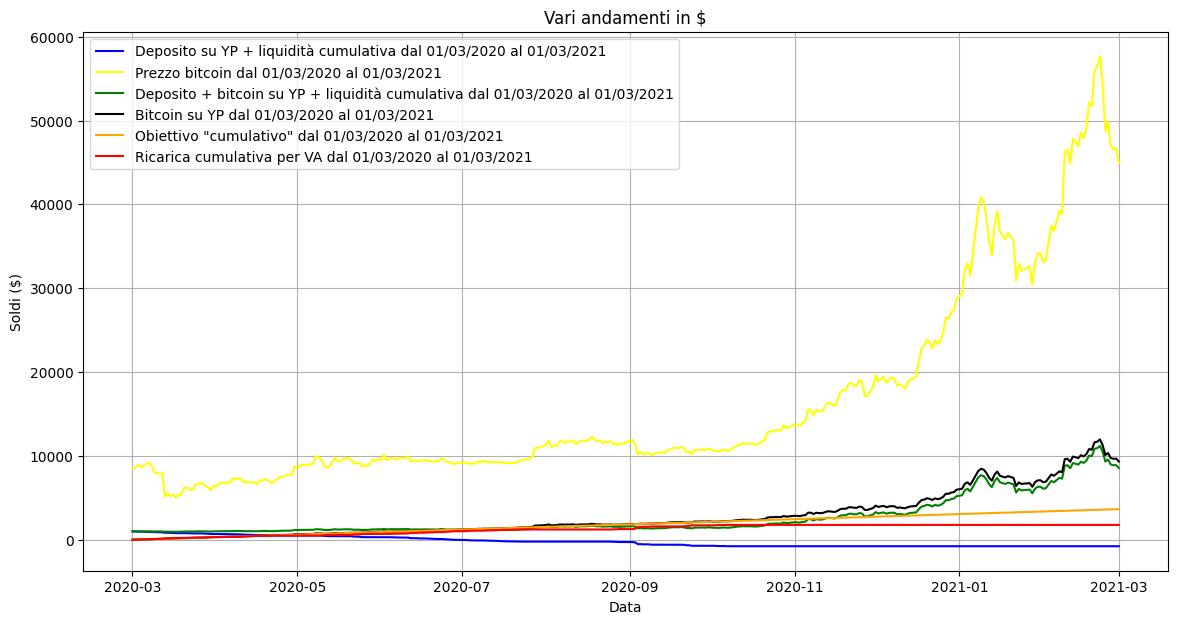

In [206]:
x = dati['Timestamp']
y = tabella_finale['Deposito su YP + liquidità cumulativa in $']
z = tabella_finale['Prezzo bitcoin in $']
w = tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $']
h = tabella_finale['Ritiro per strategia Giacomo in $']
j = tabella_finale['Bitcoin su YP in $']
k = tabella_finale['Liquidità cumulativa']
l = tabella_finale['Obiettivo "cumulativo"']
m = tabella_finale['Obiettivo "cumulativo" - bitcoin su YP in $']
n = tabella_finale['Ricarica cumulativa per VA']
plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"Deposito su YP + liquidità cumulativa dal {str(x.iloc[0].strftime('%d/%m/%Y'))} al {str(x.iloc[-1].strftime('%d/%m/%Y'))}", color='blue')
plt.plot(x, z, label=f"Prezzo bitcoin dal {str(x.iloc[0].strftime('%d/%m/%Y'))} al {str(x.iloc[-1].strftime('%d/%m/%Y'))}", color='yellow')
plt.plot(x, w, label=f"Deposito + bitcoin su YP + liquidità cumulativa dal {str(x.iloc[0].strftime('%d/%m/%Y'))} al {str(x.iloc[-1].strftime('%d/%m/%Y'))}", color='green')
# plt.plot(x, h, label=f"Ritiro per strategia Giacomo dal {str(x.iloc[0].strftime('%d/%m/%Y'))} al {str(x.iloc[-1].strftime('%d/%m/%Y'))}", color='pink')
plt.plot(x, j, label=f"Bitcoin su YP dal {str(x.iloc[0].strftime('%d/%m/%Y'))} al {str(x.iloc[-1].strftime('%d/%m/%Y'))}", color='black')
# plt.plot(x, k, label=f"Liquidità cumulativa dal {str(x.iloc[0].strftime('%d/%m/%Y'))} al {str(x.iloc[-1].strftime('%d/%m/%Y'))}", color='purple')
plt.plot(x, l, label=f"Obiettivo \"cumulativo\" dal {str(x.iloc[0].strftime('%d/%m/%Y'))} al {str(x.iloc[-1].strftime('%d/%m/%Y'))}", color='orange')
# plt.plot(x, m, label=f"Obiettivo \"cumulativo\" - bitcoin su YP dal {str(x.iloc[0].strftime('%d/%m/%Y'))} al {str(x.iloc[-1].strftime('%d/%m/%Y'))}", color='brown')
plt.plot(x, n, label=f"Ricarica cumulativa per VA dal {str(x.iloc[0].strftime('%d/%m/%Y'))} al {str(x.iloc[-1].strftime('%d/%m/%Y'))}", color='red')
plt.title('Vari andamenti in $')
plt.xlabel('Data')
plt.ylabel('Soldi ($)')
plt.legend()
plt.grid(True)
plt.show()

<h6> Grafico della quantità di Bitcoin (numericamente) </h6>

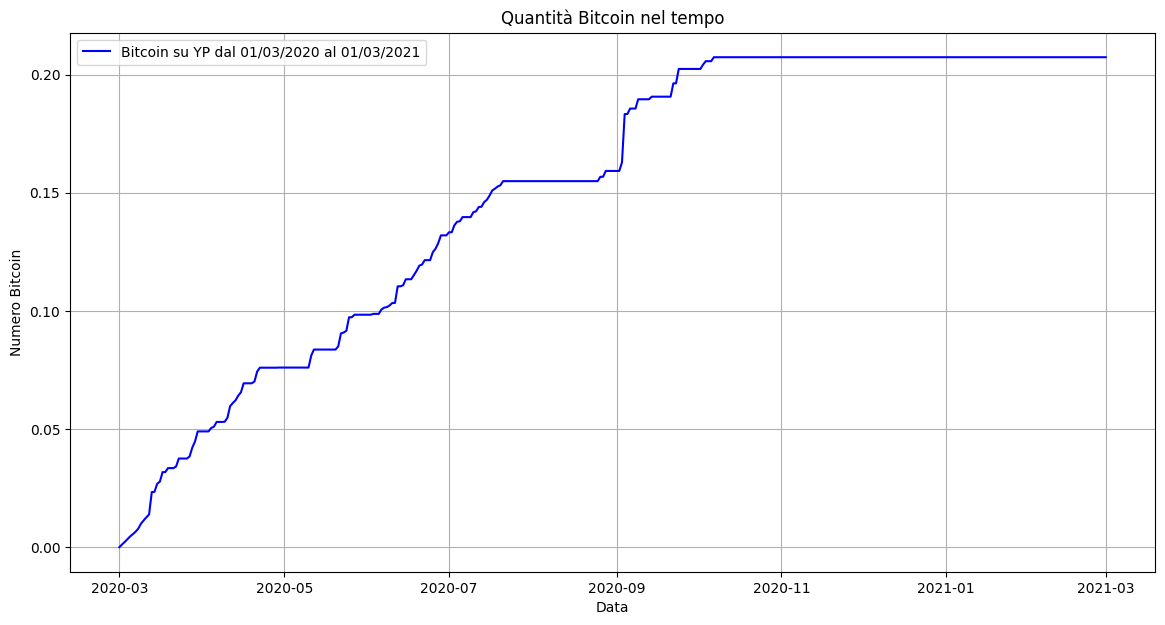

In [201]:
x = dati['Timestamp']
y = tabella_finale['Bitcoin su YP']
plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"Bitcoin su YP dal {str(x.iloc[0].strftime('%d/%m/%Y'))} al {str(x.iloc[-1].strftime('%d/%m/%Y'))}", color='blue')
plt.title('Quantità Bitcoin nel tempo')
plt.xlabel('Data')
plt.ylabel('Numero Bitcoin')
plt.legend()
plt.grid(True)
plt.show()

### Random search

In [1270]:
dati = pd.read_csv('bitcoin_data.csv')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])

In [1271]:
data_inizio = '2020-02-01'
data_fine = '2021-11-01'

In [1272]:
data1 = datetime.strptime(data_inizio, '%Y-%m-%d')
data2 = datetime.strptime(data_fine, '%Y-%m-%d')
lunghezza_periodo = (data2-data1).days
lunghezza_periodo

639

In [1273]:
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]

In [1274]:
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]

In [1275]:
dati = dati[indice_inizio:indice_fine + 1]

In [1276]:
dati = dati.reset_index(drop=True)

In [1277]:
colonne = ['Data inizio', 'Data fine', 'Lunghezza periodo (giorni)', 'Soldi in banca iniziali ($)', 'Deposito iniziale ($)', 'Investimento base', 'Strategia Giacomo', 'Percentuale ritiro eccesso', 'Tempo controllo', 'Strategia VA', 'Vendita VA', 'Prima VA', 'Tempo acquisto VA', 'Quantità VA', 'Liquidità cumulativa finale', 'Ricarica cumulativa finale', 'Deposito finale ($)', 'Deposito + liquidità cumulativa finali ($)', 'Bitcoin finali', 'Bitcoin finali ($)', 'Deposito + bitcoin + liquidità cumulativa finali ($)', 'Max delta neg su deposito + liquidità ($)', 'Max delta pos su deposito + liquidità ($)', 'Tasse pagate', 'Guadagno finale su deposito + bitcoin + liquidità cumulativa ($)', 'Guadagno / max_delta_neg', 'Guadagno - max_delta_neg']
# Creo un DataFrame vuoto con le colonne specificate
risultati = pd.DataFrame(columns=colonne)

In [1278]:
combinazioni = 1000

In [1279]:
def bitcoin_in_dollari(bitcoin, prezzo_bitcoin):
                return bitcoin * prezzo_bitcoin

def dollari_in_bitcoin(dollari, prezzo_bitcoin):
                return dollari / prezzo_bitcoin

<h6> Cuore della random search </h6>

In [1280]:
tabella_finale = dati.copy()
tabella_finale.rename(columns={'Timestamp': 'Data'}, inplace=True)
tabella_finale.rename(columns={'Price': 'Prezzo bitcoin in $'}, inplace=True)
tabella_finale['Deposito su YP + liquidità cumulativa in $'] = 0
tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'] = 0

lista_risultati = []


for conta in range(combinazioni):
        print(f'Mi sto occupando della combinazione {conta+1}/{combinazioni}...')
        dollari_in_banca = 100000
        deposito_YP = 0
        deposito_iniziale = 1000
        bitcoin_YP = 0
        bitcoin_YP_in_dollari = 0
        perc_tassa_acquisto = 0.002
        prezzo_attuale = tabella_finale['Prezzo bitcoin in $'][0]



        # Variabili
        investimento_base = random.randint(deposito_iniziale, deposito_iniziale) # Quanti $ di bitcoin compro il primo giorno; è anche la soglia per sapere se ritirare l'eccesso dei soldi
        liquidità_cumulativa = 0
        ricarica_cumulativa = 0
        # tasse_pagate_ist = 0
        tasse_pagate = 0
        strategia_giacomo = random.choice([True, True])
        strategia_VA = random.choice([False, False])

        while not strategia_giacomo and not strategia_VA:
                strategia_giacomo = random.choice([True, False])
                strategia_VA = random.choice([True, False])
        
        if strategia_giacomo:
                perc_ritiro = round(1, 2) # random.randint(9*10**15, 10**16)/10**16
                tempo_controllo = random.randint(lunghezza_periodo-9, lunghezza_periodo) # Ogni quanti giorni controllo se c'è da ritirare l'eccesso dei soldi rispetto all'investimento_base

        else:
                perc_ritiro = '-'
                tempo_controllo = '-'
        
        if strategia_VA:
                tempo_acquisto_VA = random.randint(1, 1) # Ogni quanti giorni faccio in modo di comprare (o eventualmente vendere se vendita_VA = True) bitcoin in modo che il totale valga quanto stabilito dall'obiettivo di quel giorno (ad esempio potrei avere come obiettivo il secondo giorno 200$, il terzo giorno 300$ e così via)
                quantità_VA = random.randint(deposito_iniziale, deposito_iniziale) # ogni tempo_acquisto_VA giorni compro bitcoin in $ pari al valore che serve per avere quantità_VA $ in più rispetto alla volta precedente (in particolare tempo_acquisto_VA giorni prima); quindi inizialmente ho bitcion con valore quantità_VA $, poi tempo_acquisto_VA giorni dopo ne avrò in modo che valgano 2*quantità_VA $, poi tempo_acquisto_VA dopo avrò 3*quantità_VA $ e così via
                vendita_VA = random.choice([True, False]) # se è True, significa che è possibile anche che si venda nel caso in cui il valore obiettivo del portafoglio di quel giorno debba essere inferiore a quello che in realtà ho già; se invece è False, in un caso del genere non si fa niente
        else:
                tempo_acquisto_VA = '-'
                quantità_VA = '-'
                vendita_VA = '-'
                # ricarica_cumulativa = '-'
                # liquidità_cumulativa = '-'

        if strategia_VA and strategia_giacomo:
                fare_prima_VA = random.choice([True, False]) # se è True, viene fatto prima (eventualmente) il value averaging e poi si ritira (eventualmente) la differenza tra i dollari posseduti su YP e l'investimento iniziale, altrimenti viceversa
        else:
                fare_prima_VA = '-'





        # Ricarica iniziale del deposito di YP
        dollari_in_banca -= deposito_iniziale
        deposito_YP += deposito_iniziale

        # Acquisto bitcoin su YP per la prima volta, prima di cominciare il ciclo con le mie strategie
        deposito_YP -= investimento_base * (1 + perc_tassa_acquisto)
        bitcoin_YP += dollari_in_bitcoin(investimento_base, prezzo_attuale)
        # print('Prezzo attuale:', prezzo_attuale)
        # print('bitcoin_YP', bitcoin_YP)
        bitcoin_YP_in_dollari += investimento_base
        # tasse_pagate_ist = perc_tassa_acquisto * investimento_base
        tasse_pagate += perc_tassa_acquisto * investimento_base

        tabella_finale['Deposito su YP + liquidità cumulativa in $'][0] = deposito_YP + liquidità_cumulativa
        tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0] = deposito_YP + bitcoin_YP_in_dollari + liquidità_cumulativa



        # tabella_finale['Deposito su YP in $'] = 0
        # tabella_finale['Bitcoin su YP'] = 0
        # tabella_finale['Bitcoin su YP in $'] = 0
        # tabella_finale['Ritiro per strategia Giacomo in $'] = 0
        # tabella_finale['Soldi in banca in $'] = dollari_in_banca
        # tabella_finale['Vendita effettuata'] = False
        # tabella_finale['Liquidità istantanea'] = 0
        # tabella_finale['Liquidità cumulativa'] = 0
        # tabella_finale['Obiettivo'] = 0 # La popolo successivamente
        # tabella_finale['Ricarica istantanea per VA'] = 0
        # tabella_finale['Ricarica cumulativa per VA'] = 0


        # Inizio del calcolo vero e proprio
        for t in range(1, len(dati)):
                # print(tasse_pagate)
                # liquidità_ist = 0
                prezzo_attuale = tabella_finale['Prezzo bitcoin in $'][t]
                # print('Prezzo attuale:', prezzo_attuale)
                bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                # print(bitcoin_YP_in_dollari)


                if fare_prima_VA != '-' and fare_prima_VA:
                        if tempo_acquisto_VA != '-' and t % tempo_acquisto_VA == 0 and strategia_VA != '-' and strategia_VA: # Se è un giorno in cui voglio comprare altri bitcoin
                                obiettivo = quantità_VA * t // tempo_acquisto_VA
                                ricarica = obiettivo - bitcoin_YP_in_dollari
                                liquidità = quantità_VA - ricarica
                                if liquidità >= 0 and liquidità <= quantità_VA:
                                        if deposito_YP >= liquidità: # correzzione aggiunta tardi
                                                deposito_YP -= liquidità
                                                liquidità_cumulativa += liquidità
                                elif liquidità > quantità_VA:
                                        if deposito_YP >= quantità_VA: # correzzione aggiunta tardi
                                                deposito_YP -= quantità_VA
                                                liquidità_cumulativa += quantità_VA
                                # Questo else è superfluo perchè il fondo liquidità è già 0 di base, inoltre aggiungere 0 è come non fare nulla, ma lo lascio per chiarezza
                                # else:
                                #         # liquidità_ist = 0
                                #         liquidità_cumulativa += 0


                                if ricarica >= 0:
                                        # Se non ci sono abbastanza soldi nel deposito, prendo tutto dal deposito e quello che manca dalla liquidità accumulata
                                        if ricarica * (1 + perc_tassa_acquisto) <= deposito_YP:
                                                deposito_YP -= ricarica * (1 + perc_tassa_acquisto)
                                                # tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                                # tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                                tasse_pagate += perc_tassa_acquisto * ricarica
                                        else:
                                                liquidità_cumulativa -= ricarica * (1 + perc_tassa_acquisto) - deposito_YP
                                                deposito_YP = 0
                                                # tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                                # tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                                tasse_pagate += perc_tassa_acquisto * ricarica
                                        bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale)
                                        bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                                        ricarica_cumulativa += ricarica
                                        # tabella_finale['Ricarica istantanea per VA'][t] = ricarica
                                elif vendita_VA:
                                        # tabella_finale['Vendita effettuata'][t] = True
                                        deposito_YP -= ricarica * (1 - perc_tassa_acquisto) # aumenta il deposito perchè qui ricarica è negativa; poi ci sono le tasse anche sulla vendita
                                        # tasse_pagate_ist = -perc_tassa_acquisto * ricarica
                                        # tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                        tasse_pagate -= perc_tassa_acquisto * ricarica # anche qui è importante ricordare il "-" perchè ricarica è negativa
                                        bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale) # calano perchè qui ricarica è negativa
                                        bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)

                                # tabella_finale['Obiettivo'][t] = obiettivo


                        if tempo_controllo!='-' and t % tempo_controllo == 0 and strategia_giacomo!='-' and strategia_giacomo:
                                if bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) > investimento_base:
                                        ritiro_in_dollari = (bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) - investimento_base) * perc_ritiro
                                        # tabella_finale['Ritiro per strategia Giacomo in $'][t] = ritiro_in_dollari
                                        deposito_YP += ritiro_in_dollari * (1 - perc_tassa_acquisto)
                                        # tasse_pagate_ist = perc_tassa_acquisto * ritiro_in_dollari
                                        # tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                        tasse_pagate += perc_tassa_acquisto * ritiro_in_dollari
                                        bitcoin_YP -= dollari_in_bitcoin(ritiro_in_dollari, prezzo_attuale)
                                        bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)

                else:

                        if tempo_controllo!='-' and t % tempo_controllo == 0 and strategia_giacomo!='-' and strategia_giacomo:
                                if bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) > investimento_base:
                                        ritiro_in_dollari = (bitcoin_in_dollari(bitcoin_YP, prezzo_attuale) - investimento_base) * perc_ritiro
                                        # tabella_finale['Ritiro per strategia Giacomo in $'][t] = ritiro_in_dollari
                                        deposito_YP += ritiro_in_dollari * (1 - perc_tassa_acquisto)
                                        # tasse_pagate_ist = perc_tassa_acquisto * ritiro_in_dollari
                                        # tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                        tasse_pagate += perc_tassa_acquisto * ritiro_in_dollari
                                        bitcoin_YP -= dollari_in_bitcoin(ritiro_in_dollari, prezzo_attuale)
                                        bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)


                        if tempo_acquisto_VA != '-' and t % tempo_acquisto_VA == 0 and strategia_VA != '-' and strategia_VA: # Se è un giorno in cui voglio comprare altri bitcoin
                                obiettivo = quantità_VA * t // tempo_acquisto_VA
                                # print('Obiettivo:', obiettivo)
                                ricarica = obiettivo - bitcoin_YP_in_dollari
                                # print('Ricarica:', ricarica)
                                # print('Bitcoin YP', bitcoin_YP)
                                # print('Bitcoin YP in $', bitcoin_YP_in_dollari)
                                liquidità = quantità_VA - ricarica
                                if liquidità >= 0 and liquidità <= quantità_VA:
                                        if deposito_YP >= liquidità: # correzzione aggiunta tardi
                                                deposito_YP -= liquidità
                                                liquidità_cumulativa += liquidità
                                elif liquidità > quantità_VA:
                                        if deposito_YP >= quantità_VA: # correzzione aggiunta tardi
                                                deposito_YP -= quantità_VA
                                                liquidità_cumulativa += quantità_VA
                                # Questo else è superfluo perchè il fondo liquidità è già 0 di base, inoltre aggiungere 0 è come non fare nulla, ma lo lascio per chiarezza
                                # else:
                                #         # liquidità_ist = 0
                                #         liquidità_cumulativa += 0
                                        

                                if ricarica >= 0:
                                        # Se non ci sono abbastanza soldi nel deposito, prendo tutto dal deposito e quello che manca dalla liquidità accumulata
                                        if ricarica * (1 + perc_tassa_acquisto) <= deposito_YP:
                                                deposito_YP -= ricarica * (1 + perc_tassa_acquisto)
                                                # tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                                # tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                                tasse_pagate += perc_tassa_acquisto * ricarica
                                        else:
                                                liquidità_cumulativa -= ricarica * (1 + perc_tassa_acquisto) - deposito_YP
                                                deposito_YP = 0
                                                # tasse_pagate_ist = perc_tassa_acquisto * ricarica
                                                # tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                                tasse_pagate += perc_tassa_acquisto * ricarica
                                        bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale)
                                        bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)
                                        ricarica_cumulativa += ricarica
                                        # tabella_finale['Ricarica istantanea per VA'][t] = ricarica
                                elif vendita_VA:
                                        # tabella_finale['Vendita effettuata'][t] = True
                                        deposito_YP -= ricarica * (1 - perc_tassa_acquisto) # aumenta il deposito perchè qui ricarica è negativa; poi ci sono le tasse anche sulla vendita
                                        # tasse_pagate_ist = -perc_tassa_acquisto * ricarica
                                        # tabella_finale['Tasse pagate istantanee'][t] = tasse_pagate_ist
                                        tasse_pagate -= perc_tassa_acquisto * ricarica # anche qui è importante ricordare il "-" perchè ricarica è negativa
                                        bitcoin_YP += dollari_in_bitcoin(ricarica, prezzo_attuale) # calano perchè qui ricarica è negativa
                                        bitcoin_YP_in_dollari = bitcoin_in_dollari(bitcoin_YP, prezzo_attuale)

                                # tabella_finale['Obiettivo'][t] = obiettivo
                                        
                # tabella_finale['Deposito su YP in $'][t] = deposito_YP
                tabella_finale['Deposito su YP + liquidità cumulativa in $'][t] = deposito_YP + liquidità_cumulativa
                # tabella_finale['Bitcoin su YP'][t] = bitcoin_YP
                # tabella_finale['Bitcoin su YP in $'][t] = bitcoin_YP_in_dollari
                # tabella_finale['Liquidità istantanea'][t] = liquidità_ist
                # tabella_finale['Liquidità cumulativa'][t] = liquidità_cumulativa
                tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][t] = deposito_YP + bitcoin_YP_in_dollari + liquidità_cumulativa
                # tabella_finale['Ricarica cumulativa per VA'][t] = ricarica_cumulativa



        # Analisi post calcolo
        max_delta_neg = 0
        max_delta_pos = 0
        guadagno_finale = 0



        # ind_neg = 'Nessuno'
        # ind_pos = 'Nessuno'

        for index, i in enumerate(tabella_finale['Deposito su YP + liquidità cumulativa in $']):
                if deposito_iniziale - i > max_delta_neg:
                        max_delta_neg = deposito_iniziale - i
                        # ind_neg = index

                if i - deposito_iniziale > max_delta_pos:
                        max_delta_pos = i - deposito_iniziale
                        # ind_pos = index



        guadagno_finale = tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][len(tabella_finale) - 1] - tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0]


        # Popolo la tabella dei risultati
        nuovi_dati = [data_inizio, data_fine, lunghezza_periodo, dollari_in_banca, deposito_iniziale, investimento_base, strategia_giacomo, perc_ritiro, tempo_controllo, strategia_VA, vendita_VA, fare_prima_VA, tempo_acquisto_VA, quantità_VA, liquidità_cumulativa, ricarica_cumulativa, deposito_YP, deposito_YP + liquidità_cumulativa, bitcoin_YP, bitcoin_YP_in_dollari, deposito_YP + bitcoin_YP_in_dollari + liquidità_cumulativa, max_delta_neg, max_delta_pos, tasse_pagate, guadagno_finale, guadagno_finale / max_delta_neg, guadagno_finale - max_delta_neg]

        # risultati = risultati.append(pd.Series(nuovi_dati, index=colonne), ignore_index=True)

        # In futuro dovrei essere costretto a usare il codice qui sotto al posto di append, ma provando ho notato che è molto più lento
        # nuova_serie = pd.Series(nuovi_dati, index=colonne)
        # risultati = pd.concat([risultati, nuova_serie], ignore_index=True)

        # aggiungi i tuoi dati alla lista come dizionari
        lista_risultati.append(dict(zip(colonne, nuovi_dati)))
        # alla fine, crea un DataFrame
        
risultati = pd.DataFrame(lista_risultati)

Mi sto occupando della combinazione 1/1000...


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_78784\956292637.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_finale['Deposito su YP + liquidità cumulativa in $'][0] = deposito_YP + liquidità_cumulativa
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_78784\956292637.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabella_finale['Deposito + bitcoin su YP + liquidità cumulativa in $'][0] = deposito_YP + bitcoin_YP_in_dollari + liquidità_cumulativa
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_78784\956292637.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

Mi sto occupando della combinazione 2/1000...
Mi sto occupando della combinazione 3/1000...
Mi sto occupando della combinazione 4/1000...
Mi sto occupando della combinazione 5/1000...
Mi sto occupando della combinazione 6/1000...
Mi sto occupando della combinazione 7/1000...
Mi sto occupando della combinazione 8/1000...
Mi sto occupando della combinazione 9/1000...
Mi sto occupando della combinazione 10/1000...
Mi sto occupando della combinazione 11/1000...
Mi sto occupando della combinazione 12/1000...
Mi sto occupando della combinazione 13/1000...
Mi sto occupando della combinazione 14/1000...
Mi sto occupando della combinazione 15/1000...
Mi sto occupando della combinazione 16/1000...
Mi sto occupando della combinazione 17/1000...
Mi sto occupando della combinazione 18/1000...
Mi sto occupando della combinazione 19/1000...
Mi sto occupando della combinazione 20/1000...
Mi sto occupando della combinazione 21/1000...
Mi sto occupando della combinazione 22/1000...
Mi sto occupando dell

Mi sto occupando della combinazione 106/1000...
Mi sto occupando della combinazione 107/1000...
Mi sto occupando della combinazione 108/1000...
Mi sto occupando della combinazione 109/1000...
Mi sto occupando della combinazione 110/1000...
Mi sto occupando della combinazione 111/1000...
Mi sto occupando della combinazione 112/1000...
Mi sto occupando della combinazione 113/1000...
Mi sto occupando della combinazione 114/1000...
Mi sto occupando della combinazione 115/1000...
Mi sto occupando della combinazione 116/1000...
Mi sto occupando della combinazione 117/1000...
Mi sto occupando della combinazione 118/1000...
Mi sto occupando della combinazione 119/1000...
Mi sto occupando della combinazione 120/1000...
Mi sto occupando della combinazione 121/1000...
Mi sto occupando della combinazione 122/1000...
Mi sto occupando della combinazione 123/1000...
Mi sto occupando della combinazione 124/1000...
Mi sto occupando della combinazione 125/1000...
Mi sto occupando della combinazione 126/

<h6> Tabelle </h6>

In [1281]:
risultati

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
0,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,635,False,-,-,-,-,0,0,5287.423768,5287.423768,0.017053,1048.274533,6335.698301,1002.0,4287.423768,12.600048,5337.698301,5.327044,4335.698301
1,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,634,False,-,-,-,-,0,0,5497.914566,5497.914566,0.016501,1014.317155,6512.231721,1002.0,4497.914566,13.021873,5514.231721,5.503225,4512.231721
2,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,636,False,-,-,-,-,0,0,5515.430592,5515.430592,0.016456,1011.590274,6527.020866,1002.0,4515.430592,13.056975,5529.020866,5.517985,4527.020866
3,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,630,False,-,-,-,-,0,0,5543.491396,5543.491396,0.016386,1007.252217,6550.743613,1002.0,4543.491396,13.113209,5552.743613,5.541660,4550.743613
4,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,635,False,-,-,-,-,0,0,5287.423768,5287.423768,0.017053,1048.274533,6335.698301,1002.0,4287.423768,12.600048,5337.698301,5.327044,4335.698301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,638,False,-,-,-,-,0,0,5630.122775,5630.122775,0.016171,994.091126,6624.213901,1002.0,4630.122775,13.286819,5626.213901,5.614984,4624.213901
996,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,637,False,-,-,-,-,0,0,5677.936085,5677.936085,0.016056,986.973540,6664.909625,1002.0,4677.936085,13.382637,5666.909625,5.655598,4664.909625
997,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,639,False,-,-,-,-,0,0,5590.946217,5590.946217,0.016268,1000.000000,6590.946217,1002.0,4590.946217,13.208309,5592.946217,5.581783,4590.946217
998,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,637,False,-,-,-,-,0,0,5677.936085,5677.936085,0.016056,986.973540,6664.909625,1002.0,4677.936085,13.382637,5666.909625,5.655598,4664.909625


In [1282]:
# Ordino la tabella in base al guadagno finale
ordine1 = risultati.sort_values(by='Guadagno finale su deposito + bitcoin + liquidità cumulativa ($)', ascending=False)
ordine1

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
814,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,633,False,-,-,-,-,0,0,5779.259638,5779.259638,0.015816,972.222126,6751.481763,1002.0,4779.259638,13.585691,5753.481763,5.741998,4751.481763
432,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,633,False,-,-,-,-,0,0,5779.259638,5779.259638,0.015816,972.222126,6751.481763,1002.0,4779.259638,13.585691,5753.481763,5.741998,4751.481763
533,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,633,False,-,-,-,-,0,0,5779.259638,5779.259638,0.015816,972.222126,6751.481763,1002.0,4779.259638,13.585691,5753.481763,5.741998,4751.481763
589,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,633,False,-,-,-,-,0,0,5779.259638,5779.259638,0.015816,972.222126,6751.481763,1002.0,4779.259638,13.585691,5753.481763,5.741998,4751.481763
590,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,633,False,-,-,-,-,0,0,5779.259638,5779.259638,0.015816,972.222126,6751.481763,1002.0,4779.259638,13.585691,5753.481763,5.741998,4751.481763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,635,False,-,-,-,-,0,0,5287.423768,5287.423768,0.017053,1048.274533,6335.698301,1002.0,4287.423768,12.600048,5337.698301,5.327044,4335.698301
404,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,635,False,-,-,-,-,0,0,5287.423768,5287.423768,0.017053,1048.274533,6335.698301,1002.0,4287.423768,12.600048,5337.698301,5.327044,4335.698301
840,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,635,False,-,-,-,-,0,0,5287.423768,5287.423768,0.017053,1048.274533,6335.698301,1002.0,4287.423768,12.600048,5337.698301,5.327044,4335.698301
431,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,635,False,-,-,-,-,0,0,5287.423768,5287.423768,0.017053,1048.274533,6335.698301,1002.0,4287.423768,12.600048,5337.698301,5.327044,4335.698301


In [1283]:
ordine3 = risultati.sort_values(by='Guadagno - max_delta_neg', ascending=False)
ordine3

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
814,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,633,False,-,-,-,-,0,0,5779.259638,5779.259638,0.015816,972.222126,6751.481763,1002.0,4779.259638,13.585691,5753.481763,5.741998,4751.481763
432,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,633,False,-,-,-,-,0,0,5779.259638,5779.259638,0.015816,972.222126,6751.481763,1002.0,4779.259638,13.585691,5753.481763,5.741998,4751.481763
533,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,633,False,-,-,-,-,0,0,5779.259638,5779.259638,0.015816,972.222126,6751.481763,1002.0,4779.259638,13.585691,5753.481763,5.741998,4751.481763
589,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,633,False,-,-,-,-,0,0,5779.259638,5779.259638,0.015816,972.222126,6751.481763,1002.0,4779.259638,13.585691,5753.481763,5.741998,4751.481763
590,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,633,False,-,-,-,-,0,0,5779.259638,5779.259638,0.015816,972.222126,6751.481763,1002.0,4779.259638,13.585691,5753.481763,5.741998,4751.481763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,635,False,-,-,-,-,0,0,5287.423768,5287.423768,0.017053,1048.274533,6335.698301,1002.0,4287.423768,12.600048,5337.698301,5.327044,4335.698301
404,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,635,False,-,-,-,-,0,0,5287.423768,5287.423768,0.017053,1048.274533,6335.698301,1002.0,4287.423768,12.600048,5337.698301,5.327044,4335.698301
840,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,635,False,-,-,-,-,0,0,5287.423768,5287.423768,0.017053,1048.274533,6335.698301,1002.0,4287.423768,12.600048,5337.698301,5.327044,4335.698301
431,2020-02-01,2021-11-01,639,99000,1000,1000,True,1,635,False,-,-,-,-,0,0,5287.423768,5287.423768,0.017053,1048.274533,6335.698301,1002.0,4287.423768,12.600048,5337.698301,5.327044,4335.698301


In [1284]:
soglia = deposito_iniziale
risultati_con_investimenti_sotto_soglia = risultati[risultati['Max delta neg su deposito + liquidità ($)'] <= soglia]
risultati_con_investimenti_sotto_soglia

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg


In [1285]:
risultati_con_investimenti_sotto_soglia.sort_values(by='Guadagno finale su deposito + bitcoin + liquidità cumulativa ($)', ascending = False)

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg


In [1286]:
risultati_con_investimenti_sotto_soglia.sort_values(by='Guadagno - max_delta_neg', ascending = False)

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg


In [1287]:
counter = 1
percorso_output = r'C:\Users\Alessandro\Desktop\Cartelle\Mie\Programmi personali in Python\Giochi e simulazioni\Simulazioni\Simulatore di compravendita\Analisi Bitcoin\Risultati analisi strategie di compravendita con correzione'
existing_dirs = os.listdir(percorso_output)
# Conto quanti csv ci sono già per sapere che nome dare al prossimo
while any(name.startswith(f"Risultati_{counter}") for name in existing_dirs):
    counter += 1

In [1288]:
# Esporto la tabella risultati
risultati.to_csv(f'Risultati analisi strategie di compravendita con correzione/Risultati_{counter}.csv', index = False)

### Leggo e concateno più file csv

In [1289]:
def concatena_csv(percorso):
    # Ottieni tutti i file nel percorso specificato
    files = [f for f in os.listdir(percorso) if f.endswith('.csv') and f.startswith('Risultati')]

    # Crea una lista vuota per contenere i dati
    dati = []

    # Leggi ogni file CSV e aggiungilo alla lista
    for file in files:
        dati.append(pd.read_csv(os.path.join(percorso, file)))

    # Concatena tutti i dataframe
    risultati_concatenati = pd.concat(dati, ignore_index=True)

    return risultati_concatenati

# Utilizza la funzione
risultati_concatenati = concatena_csv(percorso_output)
risultati_concatenati

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
0,2020-02-01,2021-11-01,639,99000,1000,915,True,0.97,162,False,-,-,-,-,0.000000,0.000000e+00,2020.454216,2020.454216,0.024990,1.536158e+03,3.556613e+03,916.830000,1.020454e+03,5.712333,2.558443e+03,2.790531,1.641613e+03
1,2020-02-01,2021-11-01,639,99000,1000,763,False,-,-,True,False,-,24,96,159.339292,7.598274e+01,0.000000,159.339292,0.089175,5.481779e+03,5.641118e+03,840.660708,0.000000e+00,1.677965,4.642644e+03,5.522613,3.801983e+03
2,2020-02-01,2021-11-01,639,99000,1000,617,False,-,-,True,False,-,446,498,0.000000,0.000000e+00,381.766000,381.766000,0.066287,4.074763e+03,4.456529e+03,618.234000,0.000000e+00,1.234000,3.457763e+03,5.592969,2.839529e+03
3,2020-02-01,2021-11-01,639,99000,1000,87,True,0.21,438,True,False,False,157,887,958.334923,8.398115e+02,389.115988,1347.450910,0.077029,4.735116e+03,6.082567e+03,928.665077,3.474509e+02,4.410970,5.082741e+03,5.473169,4.154076e+03
4,2020-02-01,2021-11-01,639,99000,1000,785,True,0.93,341,True,False,False,497,840,840.000000,0.000000e+00,1535.817266,2375.817266,0.025670,1.577988e+03,3.953805e+03,786.570000,1.375817e+03,5.903441,2.955375e+03,3.757295,2.168805e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540995,2020-02-01,2021-11-01,639,99000,1000,2,True,1,240,True,False,False,1,1000,-47760.442513,1.099634e+06,90219.754231,42459.311718,17.883415,1.099327e+06,1.141786e+06,198456.808103,2.158783e+05,4490.441634,1.140786e+06,5.748285,9.423295e+05
540996,2020-02-01,2021-11-01,639,99000,1000,6,True,1,236,True,True,True,1,1000,-99249.134661,3.553749e+06,286493.296716,187244.162055,10.394999,6.390000e+05,8.262442e+05,210872.472252,5.271649e+05,14616.742124,8.252442e+05,3.913475,6.143717e+05
540997,2020-02-01,2021-11-01,639,99000,1000,6,True,1,291,True,False,True,1,1000,-54620.741646,1.258810e+06,100479.174219,45858.432573,14.831643,9.117288e+05,9.575873e+05,197565.635854,7.859882e+05,5135.253059,9.565873e+05,4.841871,7.590216e+05
540998,2020-02-01,2021-11-01,639,99000,1000,10,True,1,226,True,False,True,1,1000,-38944.685888,1.245129e+06,306324.946410,267380.260522,17.883415,1.099327e+06,1.366707e+06,205641.051479,1.082830e+06,5524.363586,1.365707e+06,6.641219,1.160066e+06


In [1290]:
risultati_concatenati.sort_values(by='Guadagno - max_delta_neg', ascending = False)

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
533987,2020-02-01,2021-11-01,639,99000,1000,0,True,1,220,True,False,True,1,1000,-2.072552e+04,1.277822e+06,443122.841722,422397.320817,17.883415,1.099327e+06,1.521724e+06,193421.886496,1.286906e+06,5966.016668,1.520724e+06,7.862214,1.327302e+06
539326,2020-02-01,2021-11-01,639,99000,1000,2,True,1,220,True,False,True,1,1000,-2.072555e+04,1.277817e+06,443122.796356,422397.249977,17.883415,1.099327e+06,1.521724e+06,193421.911969,1.286904e+06,5966.000842,1.520724e+06,7.862213,1.327302e+06
533010,2020-02-01,2021-11-01,639,99000,1000,2,True,1,220,True,False,True,1,1000,-2.072555e+04,1.277817e+06,443122.796356,422397.249977,17.883415,1.099327e+06,1.521724e+06,193421.911969,1.286904e+06,5966.000842,1.520724e+06,7.862213,1.327302e+06
533468,2020-02-01,2021-11-01,639,99000,1000,3,True,1,220,True,False,True,1,1000,-2.072556e+04,1.277814e+06,443122.773673,422397.214558,17.883415,1.099327e+06,1.521724e+06,193421.924705,1.286903e+06,5965.992928,1.520724e+06,7.862212,1.327302e+06
538559,2020-02-01,2021-11-01,639,99000,1000,5,True,1,220,True,False,True,1,1000,-2.072558e+04,1.277808e+06,443122.728306,422397.143718,17.883415,1.099327e+06,1.521724e+06,193421.950178,1.286901e+06,5965.977102,1.520724e+06,7.862211,1.327302e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159388,2020-02-01,2021-11-01,639,99000,1000,561,True,0.95,1,True,True,True,1,1000,-1.368930e+06,1.939039e+08,605304.015900,-763626.308630,0.528420,3.248295e+04,-7.311434e+05,764626.308630,0.000000e+00,775639.752911,-7.321422e+05,-0.957516,-1.496769e+06
322804,2020-02-01,2021-11-01,639,99000,1000,784,True,0.97,1,True,False,True,1,1000,-1.401017e+06,1.978516e+08,617831.380960,-783186.064887,0.324221,1.993048e+04,-7.632556e+05,784186.064887,0.000000e+00,791424.136976,-7.642540e+05,-0.974583,-1.548440e+06
360609,2020-02-01,2021-11-01,639,99000,1000,775,True,0.97,1,True,True,True,1,1000,-1.401061e+06,1.978572e+08,617840.093500,-783220.884287,0.324079,1.992175e+04,-7.632991e+05,784220.884287,0.000000e+00,791446.475817,-7.642976e+05,-0.974595,-1.548518e+06
396929,2020-02-01,2021-11-01,639,99000,1000,662,True,0.98,1,True,False,True,1,1000,-1.418185e+06,1.999702e+08,624320.097520,-793865.290835,0.218454,1.342876e+04,-7.804365e+05,794865.290835,0.000000e+00,799893.313395,-7.814352e+05,-0.983104,-1.576300e+06


In [1291]:
soglia = deposito_iniziale
risultati_concatenati_con_investimenti_sotto_soglia = risultati_concatenati[risultati_concatenati['Max delta neg su deposito + liquidità ($)'] <= soglia]
risultati_concatenati_con_investimenti_sotto_soglia

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
0,2020-02-01,2021-11-01,639,99000,1000,915,True,0.97,162,False,-,-,-,-,0.000000,0.000000,2020.454216,2020.454216,0.024990,1536.158358,3556.612574,916.830000,1020.454216,5.712333,2558.442574,2.790531,1641.612574
1,2020-02-01,2021-11-01,639,99000,1000,763,False,-,-,True,False,-,24,96,159.339292,75.982743,0.000000,159.339292,0.089175,5481.778572,5641.117864,840.660708,0.000000,1.677965,4642.643864,5.522613,3801.983156
2,2020-02-01,2021-11-01,639,99000,1000,617,False,-,-,True,False,-,446,498,0.000000,0.000000,381.766000,381.766000,0.066287,4074.763343,4456.529343,618.234000,0.000000,1.234000,3457.763343,5.592969,2839.529343
3,2020-02-01,2021-11-01,639,99000,1000,87,True,0.21,438,True,False,False,157,887,958.334923,839.811454,389.115988,1347.450910,0.077029,4735.116098,6082.567008,928.665077,347.450910,4.410970,5082.741008,5.473169,4154.075931
4,2020-02-01,2021-11-01,639,99000,1000,785,True,0.93,341,True,False,False,497,840,840.000000,0.000000,1535.817266,2375.817266,0.025670,1577.987928,3953.805194,786.570000,1375.817266,5.903441,2955.375194,3.757295,2168.805194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320989,2020-02-01,2021-11-01,639,99000,1000,127,True,0.32,322,False,-,-,-,-,0.000000,0.000000,932.932303,932.932303,0.011036,678.386475,1611.318778,127.254000,0.000000,0.374614,611.572778,4.805922,484.318778
320990,2020-02-01,2021-11-01,639,99000,1000,487,True,0.4,122,False,-,-,-,-,0.000000,0.000000,1637.058305,1637.058305,0.019810,1217.756049,2854.814354,487.974000,637.058305,3.228574,1855.788354,3.803048,1367.814354
320991,2020-02-01,2021-11-01,639,99000,1000,793,True,0.41,34,False,-,-,-,-,0.000000,0.000000,2480.314397,2480.314397,0.017593,1081.476932,3561.791329,794.586000,1480.314397,6.144919,2563.377329,3.226054,1768.791329
320993,2020-02-01,2021-11-01,639,99000,1000,723,True,0.03,566,False,-,-,-,-,0.000000,0.000000,362.616603,362.616603,0.075808,4660.082957,5022.699560,724.446000,0.000000,1.620474,4024.145560,5.554790,3299.699560


In [1292]:
risultati_concatenati_con_investimenti_sotto_soglia.sort_values(by='Guadagno - max_delta_neg', ascending = False)

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
7844,2020-02-01,2021-11-01,639,99000,1000,25,True,0.71,441,True,False,True,83,398,416.325160,2168.003741,3274.252315,3690.577474,0.066954,4115.802317,7806.379791,981.674840,3906.292383,14.181533,6806.429791,6.933487,5824.754951
6092,2020-02-01,2021-11-01,639,99000,1000,861,True,0.87,423,True,False,False,175,941,0.000000,2004.608342,2319.209527,2319.209527,0.083100,5108.285410,7427.494937,921.760972,3268.788114,14.129111,6429.216937,6.974929,5507.455965
44715,2020-02-01,2021-11-01,639,99000,1000,603,True,0.88,440,True,False,False,147,944,0.000000,3618.479051,1954.764160,1954.764160,0.084281,5180.898924,7135.663085,955.077865,4229.608304,18.833111,6136.869085,6.425517,5181.791220
40791,2020-02-01,2021-11-01,639,99000,1000,647,False,-,-,True,True,-,147,961,0.000000,2067.489760,1766.002931,1766.002931,0.085799,5274.199011,7040.201942,972.782435,2513.139235,12.414794,6041.495942,6.210531,5068.713507
14091,2020-02-01,2021-11-01,639,99000,1000,974,True,0.74,386,True,True,False,159,999,999.000000,1517.336080,2002.634882,3001.634882,0.065759,4042.314734,7043.949616,987.984861,2653.771409,13.996607,6045.897616,6.119423,5057.912755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42768,2020-02-01,2021-11-01,639,99000,1000,10,True,0.81,302,True,True,False,584,940,34.874787,905.125213,671.789872,706.664659,0.003573,219.660173,926.324832,909.650812,0.000000,3.079990,-73.655168,-0.080971,-983.305980
26920,2020-02-01,2021-11-01,639,99000,1000,939,False,-,-,True,True,-,65,10,58.190555,60.111448,709.667799,767.858353,0.001915,117.724201,885.582555,940.878000,0.000000,3.539241,-112.539445,-0.119611,-1053.417445
2658,2020-02-01,2021-11-01,639,99000,1000,0,True,0.82,607,True,False,False,426,867,0.000000,867.000000,633.078999,633.078999,0.002654,163.148042,796.227041,868.734000,0.000000,2.739637,-203.772959,-0.234563,-1072.506959
17671,2020-02-01,2021-11-01,639,99000,1000,21,True,0.91,270,True,False,False,457,933,90.703724,842.296276,546.297628,637.001352,0.002042,125.531653,762.533005,856.115813,0.000000,2.732653,-237.424995,-0.277328,-1093.540808


In [1293]:
risultati_concatenati_con_investimenti_sotto_soglia[risultati_concatenati_con_investimenti_sotto_soglia['Guadagno - max_delta_neg']>2400].sort_values(by='Guadagno - max_delta_neg', ascending = False)

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
7844,2020-02-01,2021-11-01,639,99000,1000,25,True,0.71,441,True,False,True,83,398,416.32516,2168.003741,3274.252315,3690.577474,0.066954,4115.802317,7806.379791,981.674840,3906.292383,14.181533,6806.429791,6.933487,5824.754951
6092,2020-02-01,2021-11-01,639,99000,1000,861,True,0.87,423,True,False,False,175,941,0.00000,2004.608342,2319.209527,2319.209527,0.083100,5108.285410,7427.494937,921.760972,3268.788114,14.129111,6429.216937,6.974929,5507.455965
44715,2020-02-01,2021-11-01,639,99000,1000,603,True,0.88,440,True,False,False,147,944,0.00000,3618.479051,1954.764160,1954.764160,0.084281,5180.898924,7135.663085,955.077865,4229.608304,18.833111,6136.869085,6.425517,5181.791220
40791,2020-02-01,2021-11-01,639,99000,1000,647,False,-,-,True,True,-,147,961,0.00000,2067.489760,1766.002931,1766.002931,0.085799,5274.199011,7040.201942,972.782435,2513.139235,12.414794,6041.495942,6.210531,5068.713507
14091,2020-02-01,2021-11-01,639,99000,1000,974,True,0.74,386,True,True,False,159,999,999.00000,1517.336080,2002.634882,3001.634882,0.065759,4042.314734,7043.949616,987.984861,2653.771409,13.996607,6045.897616,6.119423,5057.912755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180438,2020-02-01,2021-11-01,639,99000,1000,607,True,0.9,459,False,-,-,-,-,0.00000,0.000000,2978.183831,2978.183831,0.016739,1028.992956,4007.176787,608.214000,1978.183831,6.397162,3008.390787,4.946270,2400.176787
19816,2020-02-01,2021-11-01,639,99000,1000,777,True,0.81,482,False,-,-,-,-,0.00000,0.000000,2200.971248,2200.971248,0.032147,1976.152774,4177.124021,778.554000,1200.971248,5.520984,3178.678021,4.082797,2400.124021
56374,2020-02-01,2021-11-01,639,99000,1000,730,True,0.18,62,False,-,-,-,-,0.00000,0.000000,1982.818148,1982.818148,0.034930,2147.204387,4130.022535,731.460000,982.818148,4.895427,3131.482535,4.281140,2400.022535
30150,2020-02-01,2021-11-01,639,99000,1000,974,False,-,-,True,True,-,543,468,0.00000,0.000000,3637.803977,3637.803977,0.011976,736.216534,4374.020511,975.948000,2637.803977,9.189988,3375.968511,3.459168,2400.020511


<h6> Deduplico i risultati concatenati </h6>

In [1294]:
risultati_deduplicati = risultati_concatenati.drop_duplicates()
risultati_deduplicati

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
0,2020-02-01,2021-11-01,639,99000,1000,915,True,0.97,162,False,-,-,-,-,0.000000,0.000000e+00,2020.454216,2020.454216,0.024990,1.536158e+03,3.556613e+03,916.830000,1020.454216,5.712333,2.558443e+03,2.790531,1.641613e+03
1,2020-02-01,2021-11-01,639,99000,1000,763,False,-,-,True,False,-,24,96,159.339292,7.598274e+01,0.000000,159.339292,0.089175,5.481779e+03,5.641118e+03,840.660708,0.000000,1.677965,4.642644e+03,5.522613,3.801983e+03
2,2020-02-01,2021-11-01,639,99000,1000,617,False,-,-,True,False,-,446,498,0.000000,0.000000e+00,381.766000,381.766000,0.066287,4.074763e+03,4.456529e+03,618.234000,0.000000,1.234000,3.457763e+03,5.592969,2.839529e+03
3,2020-02-01,2021-11-01,639,99000,1000,87,True,0.21,438,True,False,False,157,887,958.334923,8.398115e+02,389.115988,1347.450910,0.077029,4.735116e+03,6.082567e+03,928.665077,347.450910,4.410970,5.082741e+03,5.473169,4.154076e+03
4,2020-02-01,2021-11-01,639,99000,1000,785,True,0.93,341,True,False,False,497,840,840.000000,0.000000e+00,1535.817266,2375.817266,0.025670,1.577988e+03,3.953805e+03,786.570000,1375.817266,5.903441,2.955375e+03,3.757295,2.168805e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540947,2020-02-01,2021-11-01,639,99000,1000,6,True,1,266,True,False,False,1,1000,-76834.632647,1.023952e+06,140.317564,-76694.315083,17.883415,1.099327e+06,1.022633e+06,197565.635854,0.000000,3948.340807,1.021633e+06,5.171105,8.240670e+05
540959,2020-02-01,2021-11-01,639,99000,1000,10,True,1,265,True,False,True,1,1000,-55834.608894,1.029403e+06,4602.005659,-51232.603235,17.883415,1.099327e+06,1.048094e+06,197565.612101,514882.342879,4021.230311,1.047094e+06,5.299983,8.495288e+05
540972,2020-02-01,2021-11-01,639,99000,1000,2,True,1,222,True,False,False,1,1000,-25774.985154,1.241790e+06,310913.511137,285138.525983,17.883415,1.099327e+06,1.384465e+06,198471.350744,662210.741438,5546.539292,1.383465e+06,6.970605,1.184994e+06
540990,2020-02-01,2021-11-01,639,99000,1000,0,True,1,275,True,True,True,1,1000,-91129.460696,3.674957e+06,265500.716370,174371.255674,10.394999,6.390000e+05,8.133713e+05,198342.936387,523823.065141,15076.723432,8.123713e+05,4.095791,6.140283e+05


In [1295]:
deduplicati_ordinati = risultati_deduplicati.sort_values(by='Guadagno - max_delta_neg', ascending = False)
deduplicati_ordinati

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
533987,2020-02-01,2021-11-01,639,99000,1000,0,True,1,220,True,False,True,1,1000,-2.072552e+04,1.277822e+06,443122.841722,422397.320817,17.883415,1.099327e+06,1.521724e+06,193421.886496,1.286906e+06,5966.016668,1.520724e+06,7.862214,1.327302e+06
533010,2020-02-01,2021-11-01,639,99000,1000,2,True,1,220,True,False,True,1,1000,-2.072555e+04,1.277817e+06,443122.796356,422397.249977,17.883415,1.099327e+06,1.521724e+06,193421.911969,1.286904e+06,5966.000842,1.520724e+06,7.862213,1.327302e+06
533468,2020-02-01,2021-11-01,639,99000,1000,3,True,1,220,True,False,True,1,1000,-2.072556e+04,1.277814e+06,443122.773673,422397.214558,17.883415,1.099327e+06,1.521724e+06,193421.924705,1.286903e+06,5965.992928,1.520724e+06,7.862212,1.327302e+06
538559,2020-02-01,2021-11-01,639,99000,1000,5,True,1,220,True,False,True,1,1000,-2.072558e+04,1.277808e+06,443122.728306,422397.143718,17.883415,1.099327e+06,1.521724e+06,193421.950178,1.286901e+06,5965.977102,1.520724e+06,7.862211,1.327302e+06
532170,2020-02-01,2021-11-01,639,99000,1000,6,True,1,220,True,False,True,1,1000,-2.072560e+04,1.277805e+06,443122.705623,422397.108298,17.883415,1.099327e+06,1.521724e+06,193421.962915,1.286900e+06,5965.969188,1.520724e+06,7.862210,1.327302e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159388,2020-02-01,2021-11-01,639,99000,1000,561,True,0.95,1,True,True,True,1,1000,-1.368930e+06,1.939039e+08,605304.015900,-763626.308630,0.528420,3.248295e+04,-7.311434e+05,764626.308630,0.000000e+00,775639.752911,-7.321422e+05,-0.957516,-1.496769e+06
322804,2020-02-01,2021-11-01,639,99000,1000,784,True,0.97,1,True,False,True,1,1000,-1.401017e+06,1.978516e+08,617831.380960,-783186.064887,0.324221,1.993048e+04,-7.632556e+05,784186.064887,0.000000e+00,791424.136976,-7.642540e+05,-0.974583,-1.548440e+06
360609,2020-02-01,2021-11-01,639,99000,1000,775,True,0.97,1,True,True,True,1,1000,-1.401061e+06,1.978572e+08,617840.093500,-783220.884287,0.324079,1.992175e+04,-7.632991e+05,784220.884287,0.000000e+00,791446.475817,-7.642976e+05,-0.974595,-1.548518e+06
396929,2020-02-01,2021-11-01,639,99000,1000,662,True,0.98,1,True,False,True,1,1000,-1.418185e+06,1.999702e+08,624320.097520,-793865.290835,0.218454,1.342876e+04,-7.804365e+05,794865.290835,0.000000e+00,799893.313395,-7.814352e+05,-0.983104,-1.576300e+06


In [1296]:
deduplicati_ordinati[deduplicati_ordinati['Strategia Giacomo'] == False]

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
425232,2020-02-01,2021-11-01,639,99000,1000,1000,False,-,-,True,False,-,1,1000,-196559.748896,196165.418060,0.000000,-196559.748896,23.477370,1.443198e+06,1.246638e+06,197559.748896,0.000000,394.330836,1.245640e+06,6.305131,1.048080e+06
71243,2020-02-01,2021-11-01,639,99000,1000,1000,False,-,-,True,False,-,1,1000,-196559.748896,196165.418060,0.000000,-196559.748896,23.477370,1.443198e+06,1.246638e+06,197559.748896,0.000000,394.330836,1.245640e+06,6.305131,1.048080e+06
422349,2020-02-01,2021-11-01,639,99000,1000,999,False,-,-,True,False,-,1,1000,-196559.752164,196166.421321,0.000000,-196559.752164,23.477370,1.443198e+06,1.246638e+06,197559.752164,0.000000,394.330843,1.245640e+06,6.305131,1.048080e+06
76091,2020-02-01,2021-11-01,639,99000,1000,999,False,-,-,True,False,-,1,1000,-196559.752164,196166.421321,0.000000,-196559.752164,23.477370,1.443198e+06,1.246638e+06,197559.752164,0.000000,394.330843,1.245640e+06,6.305131,1.048080e+06
422119,2020-02-01,2021-11-01,639,99000,1000,998,False,-,-,True,False,-,1,1000,-196559.755432,196167.424583,0.000000,-196559.755432,23.477370,1.443198e+06,1.246638e+06,197559.755432,0.000000,394.330849,1.245640e+06,6.305131,1.048080e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28113,2020-02-01,2021-11-01,639,99000,1000,1,False,-,-,True,True,-,627,837,6.931374,830.068626,160.337863,167.269237,0.012973,7.974865e+02,9.647557e+02,832.730763,0.000000,1.662137,-3.524226e+01,-0.042321,-8.679730e+02
42401,2020-02-01,2021-11-01,639,99000,1000,974,False,-,-,True,True,-,128,3,6.519839,8.908952,1040.754919,1047.274759,0.000375,2.303469e+01,1.070309e+03,975.948000,53.716407,4.034254,7.225745e+01,0.074038,-9.036905e+02
39174,2020-02-01,2021-11-01,639,99000,1000,759,False,-,-,True,True,-,59,3,16.981407,24.841380,750.891891,767.873298,0.000649,3.992093e+01,8.077942e+02,760.518000,0.000000,2.676465,-1.906878e+02,-0.250734,-9.512058e+02
19939,2020-02-01,2021-11-01,639,99000,1000,5,False,-,-,True,False,-,627,991,34.656871,956.343129,2.077314,36.734185,0.015360,9.442164e+02,9.809506e+02,963.265815,0.000000,1.922686,-1.903942e+01,-0.019765,-9.823052e+02


In [1297]:
deposito_iniziale

1000

In [1298]:
soglia = deposito_iniziale
deduplicati_ordinati_con_investimenti_sotto_soglia = deduplicati_ordinati[deduplicati_ordinati['Max delta neg su deposito + liquidità ($)'] <= soglia]
deduplicati_ordinati_con_investimenti_sotto_soglia

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
7844,2020-02-01,2021-11-01,639,99000,1000,25,True,0.71,441,True,False,True,83,398,416.325160,2168.003741,3274.252315,3690.577474,0.066954,4115.802317,7806.379791,981.674840,3906.292383,14.181533,6806.429791,6.933487,5824.754951
6092,2020-02-01,2021-11-01,639,99000,1000,861,True,0.87,423,True,False,False,175,941,0.000000,2004.608342,2319.209527,2319.209527,0.083100,5108.285410,7427.494937,921.760972,3268.788114,14.129111,6429.216937,6.974929,5507.455965
44715,2020-02-01,2021-11-01,639,99000,1000,603,True,0.88,440,True,False,False,147,944,0.000000,3618.479051,1954.764160,1954.764160,0.084281,5180.898924,7135.663085,955.077865,4229.608304,18.833111,6136.869085,6.425517,5181.791220
40791,2020-02-01,2021-11-01,639,99000,1000,647,False,-,-,True,True,-,147,961,0.000000,2067.489760,1766.002931,1766.002931,0.085799,5274.199011,7040.201942,972.782435,2513.139235,12.414794,6041.495942,6.210531,5068.713507
14091,2020-02-01,2021-11-01,639,99000,1000,974,True,0.74,386,True,True,False,159,999,999.000000,1517.336080,2002.634882,3001.634882,0.065759,4042.314734,7043.949616,987.984861,2653.771409,13.996607,6045.897616,6.119423,5057.912755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42768,2020-02-01,2021-11-01,639,99000,1000,10,True,0.81,302,True,True,False,584,940,34.874787,905.125213,671.789872,706.664659,0.003573,219.660173,926.324832,909.650812,0.000000,3.079990,-73.655168,-0.080971,-983.305980
26920,2020-02-01,2021-11-01,639,99000,1000,939,False,-,-,True,True,-,65,10,58.190555,60.111448,709.667799,767.858353,0.001915,117.724201,885.582555,940.878000,0.000000,3.539241,-112.539445,-0.119611,-1053.417445
2658,2020-02-01,2021-11-01,639,99000,1000,0,True,0.82,607,True,False,False,426,867,0.000000,867.000000,633.078999,633.078999,0.002654,163.148042,796.227041,868.734000,0.000000,2.739637,-203.772959,-0.234563,-1072.506959
17671,2020-02-01,2021-11-01,639,99000,1000,21,True,0.91,270,True,False,False,457,933,90.703724,842.296276,546.297628,637.001352,0.002042,125.531653,762.533005,856.115813,0.000000,2.732653,-237.424995,-0.277328,-1093.540808


In [1299]:
deduplicati_ordinati_con_investimenti_sotto_soglia[deduplicati_ordinati_con_investimenti_sotto_soglia['Strategia Giacomo'] == False]

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
40791,2020-02-01,2021-11-01,639,99000,1000,647,False,-,-,True,True,-,147,961,0.000000,2067.489760,1766.002931,1766.002931,0.085799,5274.199011,7040.201942,972.782435,2513.139235,12.414794,6041.495942,6.210531,5068.713507
24696,2020-02-01,2021-11-01,639,99000,1000,1,False,-,-,True,True,-,101,605,478.495716,2611.469231,1111.755260,1590.250975,0.088514,5441.132432,7031.383407,983.032086,2224.913059,11.653686,6031.385407,6.135492,5048.353321
206,2020-02-01,2021-11-01,639,99000,1000,652,False,-,-,True,True,-,147,952,0.000000,2037.236110,1758.660580,1758.660580,0.084995,5224.804847,6983.465427,963.840637,2489.434525,12.298863,5984.769427,6.209294,5020.928790
49151,2020-02-01,2021-11-01,639,99000,1000,496,False,-,-,True,True,-,101,586,457.394598,2071.828872,1076.840632,1534.235230,0.085734,5270.253892,6804.489122,989.638941,2117.560819,11.362511,5805.481122,5.866262,4815.842181
35184,2020-02-01,2021-11-01,639,99000,1000,47,False,-,-,True,True,-,152,984,13.640460,2633.880616,1266.644465,1280.284925,0.089741,5516.575277,6796.860202,986.359540,1980.167763,11.306706,5796.954202,5.877121,4810.594662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28113,2020-02-01,2021-11-01,639,99000,1000,1,False,-,-,True,True,-,627,837,6.931374,830.068626,160.337863,167.269237,0.012973,797.486503,964.755739,832.730763,0.000000,1.662137,-35.242261,-0.042321,-867.973024
42401,2020-02-01,2021-11-01,639,99000,1000,974,False,-,-,True,True,-,128,3,6.519839,8.908952,1040.754919,1047.274759,0.000375,23.034693,1070.309452,975.948000,53.716407,4.034254,72.257452,0.074038,-903.690548
39174,2020-02-01,2021-11-01,639,99000,1000,759,False,-,-,True,True,-,59,3,16.981407,24.841380,750.891891,767.873298,0.000649,39.920930,807.794228,760.518000,0.000000,2.676465,-190.687772,-0.250734,-951.205772
19939,2020-02-01,2021-11-01,639,99000,1000,5,False,-,-,True,False,-,627,991,34.656871,956.343129,2.077314,36.734185,0.015360,944.216397,980.950581,963.265815,0.000000,1.922686,-19.039419,-0.019765,-982.305234


In [1300]:
deduplicati_ordinati_con_investimenti_sotto_soglia[deduplicati_ordinati_con_investimenti_sotto_soglia['Investimento base'] == 0]

,Data inizio,Data fine,Lunghezza periodo (giorni),Soldi in banca iniziali ($),Deposito iniziale ($),Investimento base,Strategia Giacomo,Percentuale ritiro eccesso,Tempo controllo,Strategia VA,Vendita VA,Prima VA,Tempo acquisto VA,Quantità VA,Liquidità cumulativa finale,Ricarica cumulativa finale,Deposito finale ($),Deposito + liquidità cumulativa finali ($),Bitcoin finali,Bitcoin finali ($),Deposito + bitcoin + liquidità cumulativa finali ($),Max delta neg su deposito + liquidità ($),Max delta pos su deposito + liquidità ($),Tasse pagate,Guadagno finale su deposito + bitcoin + liquidità cumulativa ($),Guadagno / max_delta_neg,Guadagno - max_delta_neg
1792,2020-02-01,2021-11-01,639,99000,1000,0,True,0.88,440,True,True,False,223,881,0.000000,2089.056282,3633.442899,3633.442899,0.032515,1998.768994,5632.211893,882.762000,3843.915293,13.650412,4632.211893,5.247407,3749.449893
12194,2020-02-01,2021-11-01,639,99000,1000,0,False,-,-,True,False,-,192,947,0.000000,947.000000,51.106000,51.106000,0.079828,4907.204216,4958.310216,948.894000,0.000000,1.894000,3958.310216,4.171499,3009.416216
43377,2020-02-01,2021-11-01,639,99000,1000,0,True,0.05,424,True,False,True,220,618,0.000000,618.000000,555.409925,555.409925,0.056673,3483.790224,4039.200149,619.236000,0.000000,1.585992,3039.200149,4.907984,2419.964149
30537,2020-02-01,2021-11-01,639,99000,1000,0,True,0.35,318,True,False,True,143,567,250.354355,795.456970,1404.048358,1654.402713,0.030084,1849.323028,3503.725741,749.645645,654.402713,4.499633,2503.725741,3.339879,1754.080096
22186,2020-02-01,2021-11-01,639,99000,1000,0,False,-,-,True,False,-,264,503,0.000000,503.000000,495.994000,495.994000,0.039277,2414.438373,2910.432373,504.006000,0.000000,1.006000,1910.432373,3.790495,1406.426373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271,2020-02-01,2021-11-01,639,99000,1000,0,False,-,-,True,True,-,372,818,0.000000,818.000000,180.364000,180.364000,0.020825,1280.161406,1460.525406,819.636000,0.000000,1.636000,460.525406,0.561866,-359.110594
21504,2020-02-01,2021-11-01,639,99000,1000,0,True,0.91,202,True,False,False,591,461,0.000000,461.000000,918.448340,918.448340,0.000919,56.501489,974.949828,461.922000,0.000000,1.684265,-25.050172,-0.054230,-486.972172
7167,2020-02-01,2021-11-01,639,99000,1000,0,False,-,-,True,False,-,591,849,0.000000,849.000000,149.302000,149.302000,0.018808,1156.176524,1305.478524,850.698000,0.000000,1.698000,305.478524,0.359092,-545.219476
31960,2020-02-01,2021-11-01,639,99000,1000,0,True,0.38,380,True,False,True,450,860,0.000000,860.000000,138.280000,138.280000,0.017558,1079.302801,1217.582801,861.720000,0.000000,1.720000,217.582801,0.252498,-644.137199


<h6> Esporto i risultati </h6>

In [1301]:
# Esporto i deduplicati_ordinati_con_investimenti_sotto_soglia in csv
# deduplicati_ordinati_con_investimenti_sotto_soglia.to_csv(f'Risultati con max_delta_neg su deposito + liquidità sotto {soglia} (periodo {data_inizio}-{data_fine}).csv', index=False)

In [1302]:
# Esporto i risultati concatenati in csv
# deduplicati_ordinati.to_csv(f'Risultati concatenati deduplicati (periodo {data_inizio}-{data_fine}) 2.csv', index=False)